# Comercio electrónico: análisis de la gama de productos

# Tabla de contenido

# 1. Descripción del proyecto 

[1.1 Introducción y Objetivos](#intro) 

# 2. Preprocesamiento de datos 

[2.0 Importación de librerías y base de datos](#archivo) 

[2.1 Optimizar el tamaño o almacenamiento cuando carges la base de datos.](#optimizacion)

[2.2 Cambiar los tipos de datos y nombres para cada columna.](#cambiodedatos)

[2.3 Imprime el dataset, identifica y corrige anomálias con la calidad de la información.](#anomalias)

[2.4 Identifica y completa los valores ausentes, concluye con posibles explicaciones por que pudo pasar esto.
Brinda detalles sobre cual metodo de imputación escogiste y aplicaste.](#valoresausentes)

[2.5 Elimina datos duplicados, concluye con posibles explicaciones por que pudo pasar esto.](#duplicados)

# 3. Analisis Exploratorio de Datos 

[¿Cuántos productos en total tenemos en el portafolio? Utiliza el método de value_counts.](#1)

[¿Cual es el periodo de tiempo que abarca la transacción de los datos?](#2)

[¿Cuantos clientes únicos tuvimos durante el periodo de tiempo dado? Traza un grafico de barras.](#3)

[**1. Análisis de los productos**](#ANALISIS)

[1.1 ¿Cuáles son los productos más vendidos? Realiza una tabla dinámica.](#1)

[1.2 ¿Cuáles son los productos menos vendidos? Realiza una tabla dinámica.](#2)

[1.3 ¿Cuales son los productos con mayores y menores precios? Establece rangos según los valores mínimos y máximos y estudia la distribución.](#3)

[1.4 ¿Cuáles son los productos que mayor y menor ingresos tuvieron? Determina los productos potenciales y los que se deberían dar de baja.](#4)

[**2. Análisis de los clientes**](#4)

[¿Cuánto gasta en promedio cada cliente?](#2)

[¿Como es la distribucion del numero de clientes que compran por día, semana, mes y año?](#4)

[Identifica los clientes con mayor frecuencia de compra.](#4)

[Identifica los clientes que más dinero gastaron.](#4)

[¿Cuantos items en total compran por cada factura?](#4)

[¿En que horarios los clientes realizan sus compras?,observa tendencias y picos en los horarios.](#2)

[Análisis de la tasa de retención de los clientes.](#4)

[Análisis del LTV de los clientes.](#4)

[Análisis de la compra promedio por cohorte.](#4)

[**3. Análisis de los ingresos**](#4)

[Analiza y grafica las ventas totales a través del tiempo.¿En que periodo se facturó más?](#4)

[Demuestra graficamente la estacionalidad de los productos vendidos, ¿existen productos que se venden mas en meses especificos?](#4)

[¿En que horario en promedio se registran mayores ingresos?](#4)

[Estudia y grafica la correlacion entre precio y cantidad.](#5)


# 4. Prueba de hipótesis

[1. Los ingresos promedio de los productos mas vendidos en diciembre de 2018 y diciembre 2019 son iguales.](#H1)


[2. Los ingresos promedio entre las 9 de la manana y el medio dia son iguales](#H2)

# 5.Conclusiones y Recomendaciones
[5.1 Conclusiones y Recomendaciones](#2)

# 6. Presentación y Dashbaord
[6.1 Link de la presentación y Dashboard en Tableau](#dash)


# 7. Fuentes de consulta 
[7.1 Fuentes](#d)


# 1.1 Introducción y Objetivos

Eres un Analista de Datos Jr. de una start-up que tiene una tienda en línea que vende productos para el hogar.
El departamento comercial te ha entregado la base de datos con las transacciones que se han realizado de los productos entre el 2018 y el 2019.

Tu objetivo consiste en optimizar las ventas del portafolio de productos. 

Debes presentar al equipo comercial cuales son las lineas de productos que tienen mayor potencial para incrementar las ventas y cuales son los productos que se deberían dar de baja. Tambien te va a resultar útil conocer las preferencias y gustos de los clientes para complementar el análisis con estrategias basadas en los clientes y en los productos.

El archivo `ecommerce_dataset_us.csv` contiene las siguientes columnas:

`InvoiceNo`: el identificador de pedido

`StockCode`: el identificador de artículo

`Description`: el nombre del artículo

`Quantity`: la cantidad

`InvoiceDate`: la fecha del pedido

`UnitPrice`: el precio por artículo

`CustomerID`: el ID de cada cliente

# 2. Preprocesamiento de datos

**2.0 Importación de librerías y base de datos**

Primero realizaremos la importación de las librerías, haremos la conexión con la base de datos y mostraremos la información.

In [1]:
#Importación de librerías
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import statistics as sts 
from plotly import graph_objects as go
import scipy.stats as stats
from scipy import stats as st
import datetime as dt
import plotly.express as px 
from scipy.stats import levene
from matplotlib.dates import DateFormatter

In [2]:
# Conexión a los datos 
df=pd.read_csv('/datasets/ecommerce_dataset_us.csv',sep='	')

In [3]:
# Información de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 28.9+ MB


In [4]:
# Primeras 5 filas 
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,11/29/2018 08:26,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,11/29/2018 08:26,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,11/29/2018 08:26,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,11/29/2018 08:26,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,11/29/2018 08:26,3.39,17850.0


* El tamaño del archivo  son 541,909 filas con 7 columnas. 
* Encontramos 2 columnas con valores ausentes:
    - Description: Nombre del artículo 
    - CustomerID: El ID de cada cliente
* El tipo de datos hay que cambiar segun los datos a los que hace referencia, el caso de InvoiceDate es la fecha del pedido pero se encuentra como object, cambiaremos mas adelante con pd.to_datetime, de igual manera CustomerID se encuentra como float, pero lo cambiaremos como category.
* Tenemos 5 columnas que pertenecen a object, lo cual ocupa mucho la memoria, asi que en la proxima sección realizaremos la optimización.



**2.1 Optimiza el tamaño o almacenamiento cuando carges la base de datos.**


Como observamos en la información de la base de datos, los datos estan ocupando una memoria de 28.9+ MB por lo que optimizaremos el tamaño.

Primero descargaremos las primeras 500 filas.

In [5]:
df = pd.read_csv('/datasets/ecommerce_dataset_us.csv', sep='	' ,nrows=500) 

In [6]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    500 non-null    object 
 1   StockCode    500 non-null    object 
 2   Description  500 non-null    object 
 3   Quantity     500 non-null    int64  
 4   InvoiceDate  500 non-null    object 
 5   UnitPrice    500 non-null    float64
 6   CustomerID   500 non-null    int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 149.6 KB


Tan solo las 500 filas, estan ocupando 149.6 KB.
Cambiaremos todas las columnas de tipo object a category para reducir el tamaño y tambien el formato de fecha y hora.

In [7]:
# InvoiceNo
df['InvoiceNo']=df['InvoiceNo'].astype('category')
# StockCode
df['StockCode']=df['StockCode'].astype('category')
# Description 
df['Description']=df['Description'].astype('category')
# CustomerID 
df['CustomerID']=df['CustomerID'].astype('category')
# InvoiceDate
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'], format=("%m/%d/%Y %H:%M"))


*  Ahora veremos cuanto fue la diferencia final incluyendo toda la base de datos.

In [8]:
#Dataframe optimizado con todas las filas
dd=pd.read_csv('/datasets/ecommerce_dataset_us.csv', sep='	',dtype={
    'InvoiceNo':'category',
    'StockCode':'category',
    'Description':'category',
    'CustomerID':'category',
},
parse_dates=['InvoiceDate'],
              )

In [9]:

dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  category      
 1   StockCode    541909 non-null  category      
 2   Description  540455 non-null  category      
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  category      
dtypes: category(4), datetime64[ns](1), float64(1), int64(1)
memory usage: 18.2 MB


* Del total de 541,909 filas anteriormente tenia un espacio en la memoria de 28.9 + MB, ahora logramos reducir a 18.2 MB.
* Logramos llegar a esta solucion, cambiando los tipo de datos de objetos como category y el de tipo de fecha.


**2.2 Cambiar los nombres para cada columna.**

Como obervamos anteriormente, las columnas se encuentran con la primera letra en mayúsculas, asi que cambiaremos a minúsculas para que sea mas facil interactuar.

In [10]:
#Cambio del nombre de columnas a minusculas
dd.columns=dd.columns.str.lower()

In [11]:
#Cambio del nombre de columnas utilizando snake_case
dd=dd.rename(columns={

'invoiceno':'invoice_no',
'stockcode': 'stock_code',
'invoicedate':'invoice_date',
'unitprice':'unit_price',
'customerid':'customer_id'
    
})

En nuestro analisis sera importante contener por columna el detalle de los dias, meses y año de las fechas de las transacciones.

In [12]:
dd['dia']=dd['invoice_date'].astype('datetime64[D]')
dd['mes']=dd['invoice_date'].astype('datetime64[M]')
dd['año']=dd['invoice_date'].astype('datetime64[Y]')
dd['semana']=dd['invoice_date'].astype('datetime64[W]')

In [13]:
#Comprobacion
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_no    541909 non-null  category      
 1   stock_code    541909 non-null  category      
 2   description   540455 non-null  category      
 3   quantity      541909 non-null  int64         
 4   invoice_date  541909 non-null  datetime64[ns]
 5   unit_price    541909 non-null  float64       
 6   customer_id   406829 non-null  category      
 7   dia           541909 non-null  datetime64[ns]
 8   mes           541909 non-null  datetime64[ns]
 9   año           541909 non-null  datetime64[ns]
 10  semana        541909 non-null  datetime64[ns]
dtypes: category(4), datetime64[ns](5), float64(1), int64(1)
memory usage: 34.8 MB


**2.3 Imprime el dataset, identifica y corrige anomlías con la calidad de la información.**

Mostraremos los datos que contiene cada columna para identificar cualqueir tipo de anomalía

**Identificador del pedido**

In [14]:
#Identificdor del pedido
dd['invoice_no'].value_counts().sort_values()


C553841       1
580087        1
547519        1
547522        1
547523        1
           ... 
558475      705
580729      721
581492      731
581219      749
573585     1114
Name: invoice_no, Length: 25900, dtype: int64

* Tenemos al inicio un tipo de factura que empieza con C, y otros con numeros. Filtraremos los datos para obtener mas detalles.

In [15]:
#Identificador 1: Letra C
identificador1=dd[dd.invoice_no.str.contains('C')]
identificador1

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,dia,mes,año,semana
141,C536379,D,Discount,-1,2018-11-29 09:41:00,27.50,14527,2018-11-29,2018-11-01,2018-01-01,2018-11-29
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2018-11-29 09:49:00,4.65,15311,2018-11-29,2018-11-01,2018-01-01,2018-11-29
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2018-11-29 10:24:00,1.65,17548,2018-11-29,2018-11-01,2018-01-01,2018-11-29
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2018-11-29 10:24:00,0.29,17548,2018-11-29,2018-11-01,2018-01-01,2018-11-29
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2018-11-29 10:24:00,0.29,17548,2018-11-29,2018-11-01,2018-01-01,2018-11-29
...,...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2019-12-07 09:57:00,0.83,14397,2019-12-07,2019-12-01,2019-01-01,2019-12-05
541541,C581499,M,Manual,-1,2019-12-07 10:28:00,224.69,15498,2019-12-07,2019-12-01,2019-01-01,2019-12-05
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2019-12-07 11:57:00,10.95,15311,2019-12-07,2019-12-01,2019-01-01,2019-12-05
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2019-12-07 11:58:00,1.25,17315,2019-12-07,2019-12-01,2019-01-01,2019-12-05


In [16]:
#Verificacion de cantidades positivas
identificador1_prueba=identificador1.query('quantity>0')
identificador1_prueba

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,dia,mes,año,semana


* Sacamos una primera conclusión, las facturas que empiezan con la letra C, su descripcion son todo tipo de devoluciones de los productos,descuentos, etc, porque solo hay cantidades negativas y no encontramos cantidades positivas. 




In [17]:
#Identificador 2: Letra A 
identificador2=dd[dd.invoice_no.str.contains('A')]
identificador2

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,dia,mes,año,semana
299982,A563185,B,Adjust bad debt,1,2019-08-10 14:50:00,11062.06,NaN,2019-08-10,2019-08-01,2019-01-01,2019-08-08
299983,A563186,B,Adjust bad debt,1,2019-08-10 14:51:00,-11062.06,NaN,2019-08-10,2019-08-01,2019-01-01,2019-08-08
299984,A563187,B,Adjust bad debt,1,2019-08-10 14:52:00,-11062.06,NaN,2019-08-10,2019-08-01,2019-01-01,2019-08-08


* En el identificador que empieza con la letra A, su descripcion indica que son ajustes de deudas incobrables, ya que su precio es bastante elevado y lo registran 3 veces para hacer efectivo el ajuste y podemos ver que no tenemos ningun tipo de identidicador del cliente, y su stock code es B. Con estas caracterisitcas concluimos que esta letra nos indica ajustes de deudas.

In [18]:
#Identificador 3: Numero 5 
identificador3=dd[dd.invoice_no.str.contains('5')]
identificador3

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,dia,mes,año,semana
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850,2018-11-29,2018-11-01,2018-01-01,2018-11-29
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850,2018-11-29,2018-11-01,2018-01-01,2018-11-29
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850,2018-11-29,2018-11-01,2018-01-01,2018-11-29
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850,2018-11-29,2018-11-01,2018-01-01,2018-11-29
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850,2018-11-29,2018-11-01,2018-01-01,2018-11-29
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2019-12-07 12:50:00,0.85,12680,2019-12-07,2019-12-01,2019-01-01,2019-12-05
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2019-12-07 12:50:00,2.10,12680,2019-12-07,2019-12-01,2019-01-01,2019-12-05
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2019-12-07 12:50:00,4.15,12680,2019-12-07,2019-12-01,2019-01-01,2019-12-05
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2019-12-07 12:50:00,4.15,12680,2019-12-07,2019-12-01,2019-01-01,2019-12-05


* Las facturas que empiezan con 5 corresponde a un transacción normal y vemos que tienen su descripcion , precio cantidad y codigo del cliente.
* Crearemos una columna para identificar y clasificar todos los tipo de facturas para tomar en cuenta en el análisis.

In [19]:
#Creacion columna para identificar la factura 
dd['tipo_factura']=dd["invoice_no"].str.extract('(\D+)')
dd['tipo_factura'].value_counts()

C    9288
A       3
Name: tipo_factura, dtype: int64

In [20]:
#Reemplazo del nombre para cada factura y cambio de tipo de dato
dd['tipo_factura']=dd['tipo_factura'].fillna('Transaccion')
dd['tipo_factura']=dd['tipo_factura'].replace('C','Devoluciones')
dd['tipo_factura']=dd['tipo_factura'].replace('A','Deudas')
dd['tipo_factura']=dd['tipo_factura'].astype('category')

In [21]:
#Comprobacion resultados
dd['tipo_factura'].value_counts()

Transaccion     532618
Devoluciones      9288
Deudas               3
Name: tipo_factura, dtype: int64

In [22]:
#Facturas unicas 
print('Facturas unicas',dd['invoice_no'].nunique())

Facturas unicas 25900


**Conclusiones del Invoice_no**

* Existen 25,900 facturas unicas.
* Hay 3 tipos de facturas, los que empiezan con A son ajustes de deudas, los que empiezan con C son productos que hubieron devoluciones,descuentos, etc. Y los que empiezan con el numero 5 son facturas normales con precios y cantidades positivas que lo denominamos como Transaccion.


**Identificador del artículo**

In [23]:
#Identificdor del artículo
dd['stock_code'].value_counts()


85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
          ... 
90000C       1
90037A       1
90042B       1
90060B       1
90214U       1
Name: stock_code, Length: 4070, dtype: int64

In [24]:
#Identificadores del articulo unicos 
print('Numero unico de articulos:',dd['stock_code'].nunique())

Numero unico de articulos: 4070


* Podemos ver que tenemos letras en los codigos de los productos, asi que utilizaremos una expresion regular para extraer todos los codigos que tienen letras, palabras y realizaremos una tabla dinamica para observar los datos.

In [25]:
#Dinamica con las letras del stock_code y el tipo de factura 
dd['letra_stock'] = dd["stock_code"].str.extract('(\D+)')
dinamica=dd.pivot_table(index=['tipo_factura','letra_stock'],values='customer_id',aggfunc='count')
dinamica                                            

customer_id
tipo_factura letra_stock              
Deudas       A                       0
             AMAZONFEE               0
             B                       0
             BANK CHARGES            0
             BL                      0
...                                ...
Transaccion  l                       0
             m                       0
             n                       0
             p                       0
             s                       0

[153 rows x 1 columns]

* Observamos que para las letras en minusculas no tenemos los codigos de los clientes. 
* Agrupamos la tabla dinamica para encontrar patrones entre el tipo de factura y la letra del codigo de producto. 
* Por ejemplo encontramos que todos los que tenian el stock_code con la letra B eran deudas.
* Relizaremos para las devoluciones y transacciones tablas independientes para observar si la letra del stock_code se repite.

In [26]:
# Tipo de factura devoluciones y letra stock_code
dinamica_d=dinamica.query('tipo_factura=="Devoluciones"')
dinamica_d

customer_id
tipo_factura letra_stock              
Devoluciones A                     164
             AMAZONFEE               0
             B                     189
             BANK CHARGES            0
             BL                      5
             C                     109
             CRUK                   16
             D                     103
             DCGS                    0
             DCGSSBOY                0
             DCGSSGIRL               0
             DOT                     0
             E                      20
             F                      18
             G                       9
             GR                      0
             H                       1
             I                       0
             J                       0
             K                       5
             L                      46
             LP                      0
             M                     177
             N                       6
             O                       0
             P                      14
             PADS                    0
             POST                   97
             R                       0
             S                      20
             T                       0
             U                       1
             V                       0
             W                       4
             Y                       0
             Z                       0
             a                       0
             b                       0
             bl                      0
             c                       0
             d                       0
             e                       0
             f                       0
             g                       0
             gift_                   0
             k                       0
             l                       0
             m                       0
             n                       0
             p                       0
             s                       0

In [27]:
dinamica_t=dinamica.query('tipo_factura=="Transaccion"')
dinamica_t

customer_id
tipo_factura letra_stock              
Transaccion  A                    8334
             AMAZONFEE               0
             B                    8929
             BANK CHARGES           12
             BL                    291
             C                    4196
             CRUK                    0
             D                    2316
             DCGS                    0
             DCGSSBOY                0
             DCGSSGIRL               0
             DOT                    16
             E                    1544
             F                    1347
             G                    1068
             GR                      0
             H                     211
             I                       3
             J                     133
             K                     319
             L                    1672
             LP                      0
             M                     590
             N                     438
             O                       1
             P                     621
             PADS                    4
             POST                 1099
             R                      68
             S                    1253
             T                       5
             U                     164
             V                      40
             W                     127
             Y                       3
             Z                       1
             a                       0
             b                       0
             bl                      0
             c                       0
             d                       0
             e                       0
             f                       0
             g                       0
             gift_                   0
             k                       0
             l                       0
             m                       0
             n                       0
             p                       0
             s                       0



* Para ambos tipos de facturas:transaccion y devoluciones tenemos registros de los mismas letras como Amazoonfee, cargos bancarios, etc. Esto quiere decir que tienen tanto cantidades negativas como positivas.

* Vamos a imprimir las filas del dataframe filtrando por el inicio de las palabras completas que hemos encontrado en el codigo del producto:AMAZONFEE,BANK CHARGES,CRUK,DCGS,DCGSSBOY,DCGSSGIRL,DOT,PADS,POST, y gift_.	

In [28]:
#Codigos de productos
stock_letter1=dd[dd.stock_code.str.contains('AMAZONFEE')]
stock_letter1

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,dia,mes,año,semana,tipo_factura,letra_stock
14514,C537600,AMAZONFEE,AMAZON FEE,-1,2018-12-05 12:41:00,1.00,NaN,2018-12-05,2018-12-01,2018-01-01,2018-11-29,Devoluciones,AMAZONFEE
15016,C537630,AMAZONFEE,AMAZON FEE,-1,2018-12-05 15:04:00,13541.33,NaN,2018-12-05,2018-12-01,2018-01-01,2018-11-29,Devoluciones,AMAZONFEE
15017,537632,AMAZONFEE,AMAZON FEE,1,2018-12-05 15:08:00,13541.33,NaN,2018-12-05,2018-12-01,2018-01-01,2018-11-29,Transaccion,AMAZONFEE
16232,C537644,AMAZONFEE,AMAZON FEE,-1,2018-12-05 15:34:00,13474.79,NaN,2018-12-05,2018-12-01,2018-01-01,2018-11-29,Devoluciones,AMAZONFEE
16313,C537647,AMAZONFEE,AMAZON FEE,-1,2018-12-05 15:41:00,5519.25,NaN,2018-12-05,2018-12-01,2018-01-01,2018-11-29,Devoluciones,AMAZONFEE
16356,C537651,AMAZONFEE,AMAZON FEE,-1,2018-12-05 15:49:00,13541.33,NaN,2018-12-05,2018-12-01,2018-01-01,2018-11-29,Devoluciones,AMAZONFEE
16357,C537652,AMAZONFEE,AMAZON FEE,-1,2018-12-05 15:51:00,6706.71,NaN,2018-12-05,2018-12-01,2018-01-01,2018-11-29,Devoluciones,AMAZONFEE
43702,C540117,AMAZONFEE,AMAZON FEE,-1,2019-01-03 09:55:00,16888.02,NaN,2019-01-03,2019-01-01,2019-01-01,2019-01-03,Devoluciones,AMAZONFEE
43703,C540118,AMAZONFEE,AMAZON FEE,-1,2019-01-03 09:57:00,16453.71,NaN,2019-01-03,2019-01-01,2019-01-01,2019-01-03,Devoluciones,AMAZONFEE
96844,C544587,AMAZONFEE,AMAZON FEE,-1,2019-02-19 15:07:00,5575.28,NaN,2019-02-19,2019-02-01,2019-01-01,2019-02-14,Devoluciones,AMAZONFEE


* Tenemos envios por amazon, con cantidad -1 que corresponderia a un envio por registro. Sin embargo no se ha identicado el codigo del cliente, y el tipo de facturala mayoria son tipo Devoluciones que entendemos que agrupa a todos las cantidades en negativo.


In [29]:
#Codigos de productos
stock_letter2=dd[dd.stock_code.str.contains('BANK CHARGES')]
stock_letter2

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,dia,mes,año,semana,tipo_factura,letra_stock
4406,536779,BANK CHARGES,Bank Charges,1,2018-11-30 15:08:00,15.000,15823,2018-11-30,2018-11-01,2018-01-01,2018-11-29,Transaccion,BANK CHARGES
14435,C537572,BANK CHARGES,Bank Charges,-1,2018-12-05 12:00:00,95.380,NaN,2018-12-05,2018-12-01,2018-01-01,2018-11-29,Devoluciones,BANK CHARGES
28992,C538680,BANK CHARGES,Bank Charges,-1,2018-12-11 17:10:00,966.920,NaN,2018-12-11,2018-12-01,2018-01-01,2018-12-06,Devoluciones,BANK CHARGES
62508,541505,BANK CHARGES,Bank Charges,1,2019-01-16 15:58:00,15.000,15939,2019-01-16,2019-01-01,2019-01-01,2019-01-10,Transaccion,BANK CHARGES
64573,C541653,BANK CHARGES,Bank Charges,-1,2019-01-18 11:50:00,1050.150,NaN,2019-01-18,2019-01-01,2019-01-01,2019-01-17,Devoluciones,BANK CHARGES
90558,C544049,BANK CHARGES,Bank Charges,-1,2019-02-13 12:39:00,566.370,NaN,2019-02-13,2019-02-01,2019-01-01,2019-02-07,Devoluciones,BANK CHARGES
96675,C544575,BANK CHARGES,Bank Charges,-1,2019-02-19 13:58:00,134.760,NaN,2019-02-19,2019-02-01,2019-01-01,2019-02-14,Devoluciones,BANK CHARGES
96676,C544576,BANK CHARGES,Bank Charges,-1,2019-02-19 14:01:00,149.160,NaN,2019-02-19,2019-02-01,2019-01-01,2019-02-14,Devoluciones,BANK CHARGES
96715,C544584,BANK CHARGES,Bank Charges,-1,2019-02-19 14:52:00,109.840,NaN,2019-02-19,2019-02-01,2019-01-01,2019-02-14,Devoluciones,BANK CHARGES
112233,C545887,BANK CHARGES,Bank Charges,-1,2019-03-05 15:54:00,326.680,NaN,2019-03-05,2019-03-01,2019-01-01,2019-02-28,Devoluciones,BANK CHARGES


* Encontramos el cargo de intereses del banco, en los que son intereses positivos se identifica el cliente, pero en los que son negativos no se tiene ese dato.

In [30]:
#Codigos de productos
stock_letter3=dd[dd.stock_code.str.contains('CRUK')]
stock_letter3

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,dia,mes,año,semana,tipo_factura,letra_stock
317508,C564763,CRUK,CRUK Commission,-1,2019-08-28 10:49:00,1.60,14096,2019-08-28,2019-08-01,2019-01-01,2019-08-22,Devoluciones,CRUK
324023,C565382,CRUK,CRUK Commission,-1,2019-08-31 15:45:00,13.01,14096,2019-08-31,2019-08-01,2019-01-01,2019-08-29,Devoluciones,CRUK
333779,C566216,CRUK,CRUK Commission,-1,2019-09-07 15:17:00,15.96,14096,2019-09-07,2019-09-01,2019-01-01,2019-09-05,Devoluciones,CRUK
338848,C566565,CRUK,CRUK Commission,-1,2019-09-11 12:32:00,52.24,14096,2019-09-11,2019-09-01,2019-01-01,2019-09-05,Devoluciones,CRUK
351003,C567655,CRUK,CRUK Commission,-1,2019-09-19 14:40:00,608.66,14096,2019-09-19,2019-09-01,2019-01-01,2019-09-19,Devoluciones,CRUK
361603,C568345,CRUK,CRUK Commission,-1,2019-09-24 15:28:00,447.56,14096,2019-09-24,2019-09-01,2019-01-01,2019-09-19,Devoluciones,CRUK
372785,C569245,CRUK,CRUK Commission,-1,2019-10-01 09:57:00,361.59,14096,2019-10-01,2019-10-01,2019-01-01,2019-09-26,Devoluciones,CRUK
390002,C570487,CRUK,CRUK Commission,-1,2019-10-08 17:12:00,411.92,14096,2019-10-08,2019-10-01,2019-01-01,2019-10-03,Devoluciones,CRUK
401767,C571440,CRUK,CRUK Commission,-1,2019-10-15 13:31:00,495.98,14096,2019-10-15,2019-10-01,2019-01-01,2019-10-10,Devoluciones,CRUK
416464,C572551,CRUK,CRUK Commission,-1,2019-10-22 17:07:00,425.14,14096,2019-10-22,2019-10-01,2019-01-01,2019-10-17,Devoluciones,CRUK


* Existen registros por comisiones y si tenemos registrado el codigo del cliente, seguramente corresponde a los haberes a reconocer a los vendedores.

In [31]:
#Codigos de productos DCGS,DCGSSBOY,DCGSSGIRL
stock_letter4=dd[dd.stock_code.str.contains('DCGS')]
stock_letter4

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,dia,mes,año,semana,tipo_factura,letra_stock
21326,538071,DCGS0076,SUNJAR LED NIGHT NIGHT LIGHT,1,2018-12-07 14:09:00,16.13,NaN,2018-12-07,2018-12-01,2018-01-01,2018-12-06,Transaccion,DCGS
24906,538349,DCGS0003,BOXED GLASS ASHTRAY,1,2018-12-08 14:59:00,2.51,NaN,2018-12-08,2018-12-01,2018-01-01,2018-12-06,Transaccion,DCGS
36460,539451,DCGS0003,BOXED GLASS ASHTRAY,1,2018-12-15 16:59:00,2.51,NaN,2018-12-15,2018-12-01,2018-01-01,2018-12-13,Transaccion,DCGS
39313,539631,DCGS0076,SUNJAR LED NIGHT NIGHT LIGHT,2,2018-12-18 15:03:00,16.13,NaN,2018-12-18,2018-12-01,2018-01-01,2018-12-13,Transaccion,DCGS
40052,539718,DCGS0070,CAMOUFLAGE DOG COLLAR,1,2018-12-19 13:06:00,12.72,NaN,2018-12-19,2018-12-01,2018-01-01,2018-12-13,Transaccion,DCGS
74825,542529,DCGS0055,NaN,-1,2019-01-26 13:08:00,0.00,NaN,2019-01-26,2019-01-01,2019-01-01,2019-01-24,Transaccion,DCGS
74838,542531,DCGS0072,NaN,-1,2019-01-26 13:08:00,0.00,NaN,2019-01-26,2019-01-01,2019-01-01,2019-01-24,Transaccion,DCGS
74839,542532,DCGS0074,NaN,-1,2019-01-26 13:09:00,0.00,NaN,2019-01-26,2019-01-01,2019-01-01,2019-01-24,Transaccion,DCGS
75053,542541,DCGS0069,OOH LA LA DOGS COLLAR,1,2019-01-26 14:25:00,15.79,NaN,2019-01-26,2019-01-01,2019-01-01,2019-01-24,Transaccion,DCGS
75295,542582,DCGS0057,NaN,-6,2019-01-26 15:01:00,0.00,NaN,2019-01-26,2019-01-01,2019-01-01,2019-01-24,Transaccion,DCGS


* Esta letra corresponde mas a diferenciacion entre bolsa de fiesta para niño y niña, sin embargo en esta categoria encontramos valores ausentes en los codigos del cliente y unos pocos en la descripcion del producto.

In [32]:
#Codigos de productos
stock_letter5=dd[dd.stock_code.str.contains('DOT')]
stock_letter5

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,dia,mes,año,semana,tipo_factura,letra_stock
1814,536544,DOT,DOTCOM POSTAGE,1,2018-11-29 14:32:00,569.77,NaN,2018-11-29,2018-11-01,2018-01-01,2018-11-29,Transaccion,DOT
3041,536592,DOT,DOTCOM POSTAGE,1,2018-11-29 17:06:00,607.49,NaN,2018-11-29,2018-11-01,2018-01-01,2018-11-29,Transaccion,DOT
5450,536862,DOT,DOTCOM POSTAGE,1,2018-12-01 11:13:00,254.43,NaN,2018-12-01,2018-12-01,2018-01-01,2018-11-29,Transaccion,DOT
5545,536864,DOT,DOTCOM POSTAGE,1,2018-12-01 11:27:00,121.06,NaN,2018-12-01,2018-12-01,2018-01-01,2018-11-29,Transaccion,DOT
5685,536865,DOT,DOTCOM POSTAGE,1,2018-12-01 11:28:00,498.47,NaN,2018-12-01,2018-12-01,2018-01-01,2018-11-29,Transaccion,DOT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
536834,581219,DOT,DOTCOM POSTAGE,1,2019-12-06 09:28:00,1008.96,NaN,2019-12-06,2019-12-01,2019-01-01,2019-12-05,Transaccion,DOT
537254,581238,DOT,DOTCOM POSTAGE,1,2019-12-06 10:53:00,1683.75,NaN,2019-12-06,2019-12-01,2019-01-01,2019-12-05,Transaccion,DOT
539368,581439,DOT,DOTCOM POSTAGE,1,2019-12-06 16:30:00,938.59,NaN,2019-12-06,2019-12-01,2019-01-01,2019-12-05,Transaccion,DOT
540908,581492,DOT,DOTCOM POSTAGE,1,2019-12-07 10:03:00,933.17,NaN,2019-12-07,2019-12-01,2019-01-01,2019-12-05,Transaccion,DOT


* Esta categoria tambien nos indica que se registraron envios pero no se conoce el cliente.

In [33]:
#Codigos de productos
stock_code1=dd[dd.stock_code.str.contains('PADS')]
stock_code1

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,dia,mes,año,semana,tipo_factura,letra_stock
157195,550193,PADS,PADS TO MATCH ALL CUSHIONS,1,2019-04-13 09:27:00,0.001,13952,2019-04-13,2019-04-01,2019-01-01,2019-04-11,Transaccion,PADS
279045,561226,PADS,PADS TO MATCH ALL CUSHIONS,1,2019-07-24 10:13:00,0.001,15618,2019-07-24,2019-07-01,2019-01-01,2019-07-18,Transaccion,PADS
358655,568158,PADS,PADS TO MATCH ALL CUSHIONS,1,2019-09-23 12:22:00,0.000,16133,2019-09-23,2019-09-01,2019-01-01,2019-09-19,Transaccion,PADS
359871,568200,PADS,PADS TO MATCH ALL CUSHIONS,1,2019-09-23 14:58:00,0.001,16198,2019-09-23,2019-09-01,2019-01-01,2019-09-19,Transaccion,PADS


* Este producto de fundas de almohada tienen precios 0. 

In [34]:
#Codigos de productos
stock_code1=dd[dd.stock_code.str.contains('POST')]
stock_code1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,dia,mes,año,semana,tipo_factura,letra_stock
45,536370,POST,POSTAGE,3,2018-11-29 08:45:00,18.0,12583,2018-11-29,2018-11-01,2018-01-01,2018-11-29,Transaccion,POST
386,536403,POST,POSTAGE,1,2018-11-29 11:27:00,15.0,12791,2018-11-29,2018-11-01,2018-01-01,2018-11-29,Transaccion,POST
1123,536527,POST,POSTAGE,1,2018-11-29 13:04:00,18.0,12662,2018-11-29,2018-11-01,2018-01-01,2018-11-29,Transaccion,POST
5073,536840,POST,POSTAGE,1,2018-11-30 18:27:00,18.0,12738,2018-11-30,2018-11-01,2018-01-01,2018-11-29,Transaccion,POST
5258,536852,POST,POSTAGE,1,2018-12-01 09:51:00,18.0,12686,2018-12-01,2018-12-01,2018-01-01,2018-11-29,Transaccion,POST


In [35]:
#Codigos de productos
stock_code1=dd[dd.stock_code.str.contains('gift_')]
stock_code1.tail(6)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,dia,mes,año,semana,tipo_factura,letra_stock
317500,564761,gift_0001_30,NaN,30,2019-08-28 10:48:00,0.00,NaN,2019-08-28,2019-08-01,2019-01-01,2019-08-22,Transaccion,gift_
317501,564762,gift_0001_10,NaN,30,2019-08-28 10:48:00,0.00,NaN,2019-08-28,2019-08-01,2019-01-01,2019-08-22,Transaccion,gift_
320440,564974,gift_0001_10,Dotcomgiftshop Gift Voucher £10.00,2,2019-08-29 15:32:00,8.33,NaN,2019-08-29,2019-08-01,2019-01-01,2019-08-29,Transaccion,gift_
322164,565231,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,1,2019-08-31 09:26:00,25.00,NaN,2019-08-31,2019-08-01,2019-01-01,2019-08-29,Transaccion,gift_
431349,573585,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2019-10-29 14:41:00,16.67,NaN,2019-10-29,2019-10-01,2019-01-01,2019-10-24,Transaccion,gift_
536047,581217,gift_0001_10,Dotcomgiftshop Gift Voucher £10.00,1,2019-12-06 09:20:00,8.33,NaN,2019-12-06,2019-12-01,2019-01-01,2019-12-05,Transaccion,gift_


In [36]:
#Relleno columna letra_stock
dd['letra_stock']=dd['letra_stock'].fillna('Numero')
dd['letra_stock']=dd['letra_stock'].astype('category')

**Conclusiones de Stock_code**

* Existen 4.070 codigos unicos de los productos. 
* El identificador del artículo en algunos incluye solo números y en otros una combinación con una letra o toda una palabra completa
* Observamos que esas palabras completas que se encuentran en esta columna hacen referencia a: envios de amazon, impuestos bancarios,comisiones, gastos de envio, tarjetas de regalos,etc.
* El identificar las palabras dentro del stock_code nos permitió ver que no unicamente en la base de datos tenemos codigos de los productos sino tambien se añaden el detalle de esa transacción que no tiene que ver con el catalago de productos.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy buen trabajo en esta exploración.
</div>

**Nombre del artículo: Tratamiento de valores ausentes**

In [37]:
#Identificador de nombres del producto
dd['description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
                                      ... 
WET/MOULDY                               1
WALL ART,ONLY ONE PERSON                 1
EASTER CRAFT IVY WREATH WITH CHICK       1
JAM JAR WITH BLUE LID                    1
wet boxes                                1
Name: description, Length: 4223, dtype: int64

In [38]:
#Identificadores de nombres unicos
print('Número único de nombres de productos:',dd['description'].nunique())

Número único de nombres de productos: 4223


* En esta columna fue donde encontramos que habian valores ausentes, y lo veremos en la siguiente sección.
* Existen 4,223 nombres unicos de los productos, pero si comparamos con los codigos unicos de los productos no son iguales, incluso en esta columna que tenemos valores ausentes hay mas datos únicos.
* Esto nos confirma que no existe un codigo unico para cada producto. 

In [39]:
#Valores ausentes en description 
d_va=dd[dd['description'].isna()]
d_va=d_va.reset_index()
d_va

,index,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,dia,mes,año,semana,tipo_factura,letra_stock
0,622,536414,22139,NaN,56,2018-11-29 11:52:00,0.0,NaN,2018-11-29,2018-11-01,2018-01-01,2018-11-29,Transaccion,Numero
1,1970,536545,21134,NaN,1,2018-11-29 14:32:00,0.0,NaN,2018-11-29,2018-11-01,2018-01-01,2018-11-29,Transaccion,Numero
2,1971,536546,22145,NaN,1,2018-11-29 14:33:00,0.0,NaN,2018-11-29,2018-11-01,2018-01-01,2018-11-29,Transaccion,Numero
3,1972,536547,37509,NaN,1,2018-11-29 14:33:00,0.0,NaN,2018-11-29,2018-11-01,2018-01-01,2018-11-29,Transaccion,Numero
4,1987,536549,85226A,NaN,1,2018-11-29 14:34:00,0.0,NaN,2018-11-29,2018-11-01,2018-01-01,2018-11-29,Transaccion,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1449,535322,581199,84581,NaN,-2,2019-12-05 18:26:00,0.0,NaN,2019-12-05,2019-12-01,2019-01-01,2019-12-05,Transaccion,Numero
1450,535326,581203,23406,NaN,15,2019-12-05 18:31:00,0.0,NaN,2019-12-05,2019-12-01,2019-01-01,2019-12-05,Transaccion,Numero
1451,535332,581209,21620,NaN,6,2019-12-05 18:35:00,0.0,NaN,2019-12-05,2019-12-01,2019-01-01,2019-12-05,Transaccion,Numero
1452,536981,581234,72817,NaN,27,2019-12-06 10:33:00,0.0,NaN,2019-12-06,2019-12-01,2019-01-01,2019-12-05,Transaccion,Numero


In [40]:
print('Valores ausentes en description:',((len(d_va)/ len(dd))*100))

Valores ausentes en description: 0.2683107311375157


* Tenemos 1,454 valores ausentes en description y representa a penas un 0.26% sobre los datos totales. 
* Tambien observamos que hay valores ausentes en el customer_id.Realizaremos en conjunto el filtrado de los valores ausentes por las 2 columnas.

In [41]:
#Valores ausentes por las columnas description y customer id 
dyc_va=dd[dd['description'].isna() & dd['customer_id'].isna()]
dyc_va

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,dia,mes,año,semana,tipo_factura,letra_stock
622,536414,22139,NaN,56,2018-11-29 11:52:00,0.0,NaN,2018-11-29,2018-11-01,2018-01-01,2018-11-29,Transaccion,Numero
1970,536545,21134,NaN,1,2018-11-29 14:32:00,0.0,NaN,2018-11-29,2018-11-01,2018-01-01,2018-11-29,Transaccion,Numero
1971,536546,22145,NaN,1,2018-11-29 14:33:00,0.0,NaN,2018-11-29,2018-11-01,2018-01-01,2018-11-29,Transaccion,Numero
1972,536547,37509,NaN,1,2018-11-29 14:33:00,0.0,NaN,2018-11-29,2018-11-01,2018-01-01,2018-11-29,Transaccion,Numero
1987,536549,85226A,NaN,1,2018-11-29 14:34:00,0.0,NaN,2018-11-29,2018-11-01,2018-01-01,2018-11-29,Transaccion,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2019-12-05 18:26:00,0.0,NaN,2019-12-05,2019-12-01,2019-01-01,2019-12-05,Transaccion,Numero
535326,581203,23406,NaN,15,2019-12-05 18:31:00,0.0,NaN,2019-12-05,2019-12-01,2019-01-01,2019-12-05,Transaccion,Numero
535332,581209,21620,NaN,6,2019-12-05 18:35:00,0.0,NaN,2019-12-05,2019-12-01,2019-01-01,2019-12-05,Transaccion,Numero
536981,581234,72817,NaN,27,2019-12-06 10:33:00,0.0,NaN,2019-12-06,2019-12-01,2019-01-01,2019-12-05,Transaccion,Numero


* Encontramos que los 1,454 si son valores ausentes tanto en la descripcion del producto como en el codigo del cliente.
* De igual manera tampoco contienen el valor del precio, por lo que observamos son todos 0.
* Dado que solo representa un 0.26% , procederemos a eliminar estos registros que no aportan para el analisis.

In [42]:
#Eliminacion valores ausentes que coinciden en description y en customer id 
dd=dd.dropna(subset=['description'])
dd

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,dia,mes,año,semana,tipo_factura,letra_stock
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850,2018-11-29,2018-11-01,2018-01-01,2018-11-29,Transaccion,A
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850,2018-11-29,2018-11-01,2018-01-01,2018-11-29,Transaccion,Numero
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850,2018-11-29,2018-11-01,2018-01-01,2018-11-29,Transaccion,B
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850,2018-11-29,2018-11-01,2018-01-01,2018-11-29,Transaccion,G
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850,2018-11-29,2018-11-01,2018-01-01,2018-11-29,Transaccion,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2019-12-07 12:50:00,0.85,12680,2019-12-07,2019-12-01,2019-01-01,2019-12-05,Transaccion,Numero
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2019-12-07 12:50:00,2.10,12680,2019-12-07,2019-12-01,2019-01-01,2019-12-05,Transaccion,Numero
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2019-12-07 12:50:00,4.15,12680,2019-12-07,2019-12-01,2019-01-01,2019-12-05,Transaccion,Numero
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2019-12-07 12:50:00,4.15,12680,2019-12-07,2019-12-01,2019-01-01,2019-12-05,Transaccion,Numero


In [43]:
#Comprobacion de los valores eliminados 
dd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540455 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_no    540455 non-null  category      
 1   stock_code    540455 non-null  category      
 2   description   540455 non-null  category      
 3   quantity      540455 non-null  int64         
 4   invoice_date  540455 non-null  datetime64[ns]
 5   unit_price    540455 non-null  float64       
 6   customer_id   406829 non-null  category      
 7   dia           540455 non-null  datetime64[ns]
 8   mes           540455 non-null  datetime64[ns]
 9   año           540455 non-null  datetime64[ns]
 10  semana        540455 non-null  datetime64[ns]
 11  tipo_factura  540455 non-null  category      
 12  letra_stock   540455 non-null  category      
dtypes: category(6), datetime64[ns](5), float64(1), int64(1)
memory usage: 39.8 MB


**Conclusiones intermedias description**
* Encontramos valores ausentes que se repetian para los customer id
* Eliminamos los valores ausentes porque solo representaban un pequeno porcentaje comparado con toda la base de datos.

**Cantidad de articulos del pedido**

In [44]:
#Cantidad de articulos del pedido
dd['quantity'].value_counts()

 1       148101
 2        81763
 12       61049
 6        40846
 4        38461
          ...  
 1350         1
 326          1
-186          1
 3906         1
 512          1
Name: quantity, Length: 671, dtype: int64

In [45]:
dd['quantity'].max()

80995

In [46]:
dd['quantity'].min()

-80995

* Encontramos cantidades en valores negativos, esto ciertamente afecta a la calidad de los datos y antes de comenzar con el analisis tenemos que encontrar que impacto puede tener.
* Una razón puede ser que en esta base de datos también se obtuvieron las devoluciones en cada pedido.
* Para obtener mas respuestas, realizaremos una query para ver la caracteristicas de las otras variables.

In [47]:
#Cantidades negativas 
cantidades_negativas=dd.query('quantity < 0')
cantidades_negativas.reset_index().head(13)

,index,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,dia,mes,año,semana,tipo_factura,letra_stock
0,141,C536379,D,Discount,-1,2018-11-29 09:41:00,27.50,14527,2018-11-29,2018-11-01,2018-01-01,2018-11-29,Devoluciones,D
1,154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2018-11-29 09:49:00,4.65,15311,2018-11-29,2018-11-01,2018-01-01,2018-11-29,Devoluciones,C
2,235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2018-11-29 10:24:00,1.65,17548,2018-11-29,2018-11-01,2018-01-01,2018-11-29,Devoluciones,Numero
3,236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2018-11-29 10:24:00,0.29,17548,2018-11-29,2018-11-01,2018-01-01,2018-11-29,Devoluciones,Numero
4,237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2018-11-29 10:24:00,0.29,17548,2018-11-29,2018-11-01,2018-01-01,2018-11-29,Devoluciones,Numero
5,238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2018-11-29 10:24:00,0.29,17548,2018-11-29,2018-11-01,2018-01-01,2018-11-29,Devoluciones,Numero
6,239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2018-11-29 10:24:00,3.45,17548,2018-11-29,2018-11-01,2018-01-01,2018-11-29,Devoluciones,Numero
7,240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2018-11-29 10:24:00,1.65,17548,2018-11-29,2018-11-01,2018-01-01,2018-11-29,Devoluciones,Numero
8,241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2018-11-29 10:24:00,1.65,17548,2018-11-29,2018-11-01,2018-01-01,2018-11-29,Devoluciones,Numero
9,939,C536506,22960,JAM MAKING SET WITH JARS,-6,2018-11-29 12:38:00,4.25,17897,2018-11-29,2018-11-01,2018-01-01,2018-11-29,Devoluciones,Numero


In [48]:
valores_anomalos=len(cantidades_negativas)/len(dd)
print(f'Porcentaje de cantidades negativas:{valores_anomalos:.0%}')

Porcentaje de cantidades negativas:2%


* Obtenemos 10,624 registros con cantidades negativas, lo cual representa a penas un 2% sobre el total de la base de datos. 
* Realizaremos mas analisis para saber que identifican a estas cantidades negativas.


In [49]:
#Cual es tipo de factura y descripcion del productos para las cantidades negativas
tabla1=cantidades_negativas.pivot_table(index=['tipo_factura','description'],values='invoice_no',aggfunc='count').sort_values(by='invoice_no',ascending=False)
tabla1.head(10)

invoice_no
tipo_factura description                                  
Devoluciones Manual                                    244
             REGENCY CAKESTAND 3 TIER                  181
             POSTAGE                                   126
Transaccion  check                                     120
Devoluciones JAM MAKING SET WITH JARS                   87
             Discount                                   77
             SET OF 3 CAKE TINS PANTRY DESIGN           74
             SAMPLES                                    61
             STRAWBERRY CERAMIC TRINKET BOX             55
             ROSES REGENCY TEACUP AND SAUCER            54

* El tipo de factura que denominamos como Devoluciones corresponde a una categoria en general donde vemos que abarca a Manual, descuentos, entrega de muestras, envios, etc
* Para la descripcion de check , encontramos productos con cantidades negativas en las transacciones normales.
* Mantendremos estos datos para poder analizarlos despues.

A continuacion graficaremos la distribucion de las cantidades en un diagrama de caja.

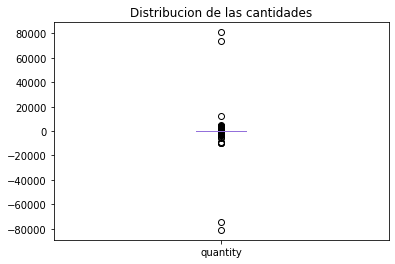

In [50]:
cantidades=dd['quantity'].plot(kind='box',title='Distribucion de las cantidades',color='mediumpurple')
plt.show()

In [51]:
#Registros con cantidades menores a 20.0000
menor=dd.query('quantity < -20000')
menor

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,dia,mes,año,semana,tipo_factura,letra_stock
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2019-01-16 10:17:00,1.04,12346,2019-01-16,2019-01-01,2019-01-01,2019-01-10,Devoluciones,Numero
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2019-12-07 09:27:00,2.08,16446,2019-12-07,2019-12-01,2019-01-01,2019-12-05,Devoluciones,Numero


In [52]:
#Registros con cantidadaes mayores a 20.000
mayor=dd.query('quantity > 20000')
mayor

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,dia,mes,año,semana,tipo_factura,letra_stock
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2019-01-16 10:01:00,1.04,12346,2019-01-16,2019-01-01,2019-01-01,2019-01-10,Transaccion,Numero
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2019-12-07 09:15:00,2.08,16446,2019-12-07,2019-12-01,2019-01-01,2019-12-05,Transaccion,Numero


* Hay 4 valores atípicos que podemos ver de 80,995 y 74,215 cantidades y el reverso de esas cantidades.
* En el grafico vemos que la mayoria se distribuye hasta 10,000 y -10.000 cantidades. 
* Para evitar el sesgo que pueda afectar mantener estos valores atipicos, los eliminaremos de la base de datos.

In [53]:
#Mantenemos los rangos hasta 20.0000 y -20.0000
dd = dd.query('quantity > -20000 and quantity < 20000')

**Conclusiones intermedias quantity**

* Las cantidades negativas indicaron que estaban mas presentes en los tipos de facturas de devoluciones y en menor cantidad para las tipo transacciones.
* Hubieron valores atipicos tanto en cantidades negativas como positivas, para evitar el sesgo se eliminaron los datos con cantidades inferiores y mayores a 20.000.


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo con la identificación de este problema.
</div>

**Fecha del pedido**

A continuación observaremos desde que meses y años tenemos la informacion de las transacciones de la tienda.

In [54]:
dd['mes']= dd['mes'].dt.date

/tmp/ipykernel_67/1722907342.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dd['mes']= dd['mes'].dt.date


<AxesSubplot:xlabel='mes'>

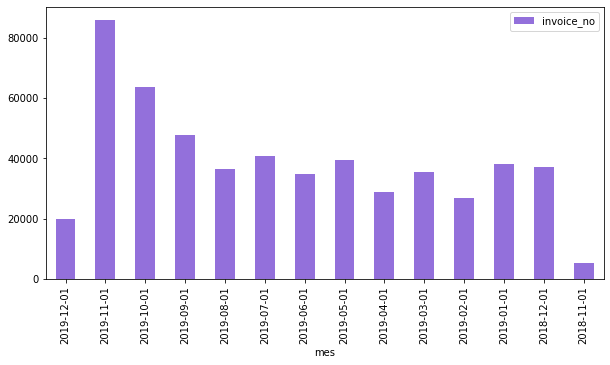

In [55]:
#Mes de inicio y fin

fechas=dd.pivot_table(index='mes',values='invoice_no',aggfunc='count')
fechas=fechas.sort_values(by='mes',ascending=False).plot(kind='bar',figsize=(10,5),color='mediumpurple')
fechas

* Contenemos datos de las transacciones desde noviembre del 2018 hasta diciembre del 2019.

**Precio del articulo**

In [56]:
#Precio del articulo 
dd['unit_price'].value_counts()

1.25      50496
1.65      38181
0.85      28497
2.95      27768
0.42      24533
          ...  
110.43        1
117.63        1
47.67         1
178.71        1
0.66          1
Name: unit_price, Length: 1630, dtype: int64

In [57]:
dd['unit_price'].min()

-11062.06

In [58]:
dd['unit_price'].max()

38970.0

* Hay 1,630 precios únicos. 
* Utilzaremos una query para comprobar cuantos registros tenemos de precio con valores negativos.

In [59]:
# Precios negativos 
precio_negativo=dd.query('unit_price <0')
precio_negativo

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,dia,mes,año,semana,tipo_factura,letra_stock
299983,A563186,B,Adjust bad debt,1,2019-08-10 14:51:00,-11062.06,NaN,2019-08-10,2019-08-01,2019-01-01,2019-08-08,Deudas,B
299984,A563187,B,Adjust bad debt,1,2019-08-10 14:52:00,-11062.06,NaN,2019-08-10,2019-08-01,2019-01-01,2019-08-08,Deudas,B


* Encontramos que hay 1 solo precio negativo, sin embargo se encuentra repetido 2 veces y podemos ver que no tienen el ID del cliente. Adicional que pertenece a la categoria de Deudas.
* El stock_code de B indicaba que eran deudas.Lo mantendremos estos datos, dado que nos interesa conocer tambien las ganancias y si hay deudas incobrables tambien afectara a nuestro rendimiento. 

In [60]:
#Precios en 0 
precio_cero=dd.query('unit_price ==0')
precio_cero

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,dia,mes,año,semana,tipo_factura,letra_stock
6391,536941,22734,amazon,20,2018-12-01 12:08:00,0.0,NaN,2018-12-01,2018-12-01,2018-01-01,2018-11-29,Transaccion,Numero
6392,536942,22139,amazon,15,2018-12-01 12:08:00,0.0,NaN,2018-12-01,2018-12-01,2018-01-01,2018-11-29,Transaccion,Numero
7313,537032,21275,?,-30,2018-12-01 16:50:00,0.0,NaN,2018-12-01,2018-12-01,2018-01-01,2018-11-29,Transaccion,Numero
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2018-12-03 14:02:00,0.0,12647,2018-12-03,2018-12-01,2018-01-01,2018-11-29,Transaccion,Numero
13217,537425,84968F,check,-20,2018-12-04 15:35:00,0.0,NaN,2018-12-04,2018-12-01,2018-01-01,2018-11-29,Transaccion,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...
535336,581213,22576,check,-30,2019-12-05 18:38:00,0.0,NaN,2019-12-05,2019-12-01,2019-01-01,2019-12-05,Transaccion,Numero
536908,581226,23090,missing,-338,2019-12-06 09:56:00,0.0,NaN,2019-12-06,2019-12-01,2019-01-01,2019-12-05,Transaccion,Numero
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2019-12-06 13:58:00,0.0,NaN,2019-12-06,2019-12-01,2019-01-01,2019-12-05,Transaccion,M
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2019-12-06 13:58:00,0.0,NaN,2019-12-06,2019-12-01,2019-01-01,2019-12-05,Transaccion,S


* Tenemos 1,061 registros con precios en cero, y encontramos 2 caracterisiticas en comun: coincide que tenemos tambien valores ausentes en la mayoria de los clientes y tambien hay cantidades en negativo. 


In [61]:
#Verificacion con el tipo de factura 
precio_cero['tipo_factura'].value_counts()

Transaccion     1061
Deudas             0
Devoluciones       0
Name: tipo_factura, dtype: int64

* Encontramos que los registros con precios en cero son solo de transacciones con categorias como check, missing y un signo de interrogación.

In [62]:
#Valores ausentes de clientes
p_cero=len(precio_cero)
va_c=precio_cero['customer_id'].isna().sum()
print(f'Porcentaje de valor ausente de los clientes en los precios que tuvieron cero:{va_c/p_cero:.0%}')

Porcentaje de valor ausente de los clientes en los precios que tuvieron cero:96%


* Los precios con valor 0 no tienen identificado en la mayoria a ningun codigo del cliente,vamos a hacer una tabla dinamica para contemplar todas las descripciones de los productos bajo la categoria de transacciones.

In [63]:
#Identificacion de los nombres de los productos 
name_products=precio_cero.pivot_table(index='description',values='invoice_no',aggfunc='count').sort_values(by='invoice_no',ascending=False)
name_products.head(10)

,invoice_no
description,
check,159
?,47
damages,45
damaged,43
found,25
sold as set on dotcom,20
adjustment,16
Damaged,14
FRENCH BLUE METAL DOOR SIGN 1,9


* Al imprimir las primeras 10 filas encontramos que hay productos que estan dañados, bajo daños y perjuicios,ajustes, destruidos, indeseables, desechados y con los signos de interrogación que se interpreta que se desconoce o se perdió esa información. Y que tambien han sido vendidos en otros portales como amazon y se desconce el cliente final.
* Finalmente con estos detalles mas a fondo que encontramos concluimos con 2 puntos: 
  1. No tenemos el tracking de quienes fueron los clientes que compraron un producto con precio $0. 
  2. Esto se debe a que encontramos productos que no estaban al alcance de ser comercializados, debido a fallas y que fueron desechados. Sin embargo tambien hay nombres en la descripcion que si hacen referencia a los productos y que se puede dar la interpretacion de que pudieron ser regalados, donados, etc y no se registró como una venta. 

In [64]:
#precio con cero y con cantidades negativas 
pyc= precio_cero.query('quantity < 0').pivot_table(index='description',values='quantity',aggfunc='count').sort_values(by='quantity',ascending=False)
pyc.head()

,quantity
description,
check,120
damages,45
damaged,42
?,41
sold as set on dotcom,20


* Volvemos a comprobar que en el caso de la misma categoria de productos que estuvieron dañados, etc hay cantidades en negativo, a pesar de que no tenian un precio.
* Finalmente, mantendremos los datos en 0 de los precios, debido a que igualmente al momento de analizar los ingresos estos valores se anularan porque no representaron ganancias ni rentabilidad, pero nos servirá para comprar con el catalago de productos y darles de baja. 

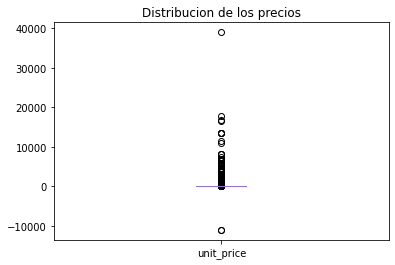

In [65]:
#Valores atipicos con el precio
precio_distribucion=dd['unit_price'].plot(kind='box',title='Distribucion de los precios',color='mediumpurple')
plt.show()

* Encontramos valores atipicos de -10,000 y 40,0000, los precios negativos ya vimos que eran parte de un ajuste en la deuda. 
* Filtraremos los datos de los precios mayores a 30.000 para observar en la base general.

In [66]:
#Precio maximo 
precio_max=dd.query('unit_price >30000')
precio_max

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,dia,mes,año,semana,tipo_factura,letra_stock
222681,C556445,M,Manual,-1,2019-06-08 15:31:00,38970.0,15098,2019-06-08,2019-06-01,2019-01-01,2019-06-06,Devoluciones,M


* Corresponde a devoluciones, si tenemos los datos compeltos para las demas variables asi que nos interesa medir tambien la rentabilidad y ver los productos para dar de baja si tienen mayores devoluciones. Por lo tanto nos quedaremos cone tos datos.

**Conclusiones intermedias precio**
* Hay valores atipicos negativo, sin embargo correspndia al ajuste de las deudas y el valor positivo atipico correspondia a una devolucion, por lo tanto mantenemos los mismos datos.

**Número del Cliente : Tratamiento de valores ausentes para customer_id**

In [67]:
dd['customer_id'].value_counts()

17841    7983
14911    5903
14096    5128
12748    4642
14606    2782
         ... 
16990       1
13703       1
17307       1
17291       1
12346       0
Name: customer_id, Length: 4372, dtype: int64

* Tenemos identificado a 4,372 clientes unicos. 



In [68]:
#Numero de valores ausentes
valores_ausentes=dd['customer_id'].isna().sum()
valor_total=len(dd['invoice_no'])

print('Porcentaje de valores ausentes:',(valores_ausentes/valor_total)*100)

Porcentaje de valores ausentes: 24.724905680625998


* Tenemos un 25% de valores ausentes en la columna del codigo del cliente.Esto si representa una gran magnitud de datos faltantes, pero primero filtraremos la base de datos con los valores ausentes para encontrar patrones o características en las demás variables.

<AxesSubplot:title={'center':'Distribucion del numero de productos por mes'}, xlabel='mes', ylabel='invoice_no'>

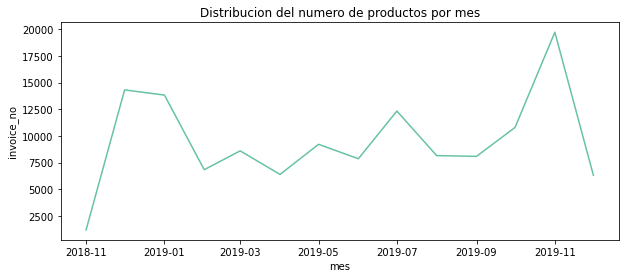

In [69]:
#Base completa con las demas columnas, y en blanco las de customer_id

customer_blank= dd[(dd['customer_id'].isna())]
customer_blank1=customer_blank.pivot_table(index='mes',values='invoice_no',aggfunc='count')

#Grafico con la distribucion Mes vs Registros de facturacion 
sns.set_palette("Set2")
plt.figure(figsize=(10, 4)) 
plt.title('Distribucion del numero de productos por mes')
sns.lineplot(data=customer_blank1,x='mes',y='invoice_no')

* Encontramos que el en noviembre, eran pocos los valores ausentes de los clientes en las compras registradas. 
* Sin embargo a medida que paso el tiempo fue aumentando, y tenemos un pico en noviembre del 2019 con 20,000 registros de transacciones de las cuales no tenemos el identificador del cliente.

Vamos a comprobar la distrbucion de los valores ausentes en las demas variables.

In [70]:
#Por descripcion del producto 
customer_blank['description'].value_counts()

DOTCOM POSTAGE                         693
JUMBO BAG RED RETROSPOT                497
JUMBO STORAGE BAG SUKI                 414
JUMBO SHOPPER VINTAGE RED PAISLEY      388
JUMBO BAG WOODLAND ANIMALS             372
                                      ... 
GLASS BELL JAR LARGE                     0
SET/4 GARDEN ROSE DINNER CANDLE          0
FOOD COVER WITH BEADS , SET 2 SIZES      0
GLASS BEAD HOOP NECKLACE AMETHYST        0
WRAP DAISY CARPET                        0
Name: description, Length: 4223, dtype: int64

* Tambien obtenemos valores ausentes para productos que si son parte de la comercialización, como podemos ver en los ejemplos.

In [71]:
#Por tipo de factura
customer_blank['tipo_factura'].value_counts()

Transaccion     133240
Devoluciones       383
Deudas               3
Name: tipo_factura, dtype: int64

* En su mayoria no tenemos los registros de los clientes en las facturas tipo transacciones.
* Tampoco tenemos identificado cuales clientes hicieron la devolucion de 383 registros.

In [72]:
#Precio 
customer_blank['unit_price'].value_counts().head(20)

2.46     16081
4.13     14804
1.63     12027
0.83     10990
3.29     10698
5.79      6486
8.29      4606
4.96      4376
1.25      3941
7.46      3073
10.79     2959
2.51      2709
0.42      2501
1.66      2490
4.21      2180
3.36      2112
0.85      2101
16.63     1606
12.46     1464
5.91      1419
Name: unit_price, dtype: int64

* Hay mas registros que se facturaron por precios unitarios desde 0.83 hasta $16, para clientes que no tenemos identificados.

In [73]:
#Identificador por el codigo del producto 
customer_blank['stock_code'].value_counts()

DOT       693
85099B    497
21931     414
22411     388
20712     372
         ... 
84966A      0
84966B      0
84967A      0
84967B      0
90214U      0
Name: stock_code, Length: 4070, dtype: int64

* Encontramos el codigo de "DOT", vamos a ver en la descripcion, cantidad y precio si encontramos mas detalles. 

In [74]:
#Codigo del producto, precio unitario y cantidad
u=customer_blank.query('stock_code=="DOT"')
u[['description','quantity','unit_price']]

,description,quantity,unit_price
1814,DOTCOM POSTAGE,1,569.77
3041,DOTCOM POSTAGE,1,607.49
5450,DOTCOM POSTAGE,1,254.43
5545,DOTCOM POSTAGE,1,121.06
5685,DOTCOM POSTAGE,1,498.47
...,...,...,...
536834,DOTCOM POSTAGE,1,1008.96
537254,DOTCOM POSTAGE,1,1683.75
539368,DOTCOM POSTAGE,1,938.59
540908,DOTCOM POSTAGE,1,933.17


* Este nombre quiere decir que se registraron por gastos de envio, y quiza por eso no se obtuvo el codigo del cliente final.
* Se registran como una sola cantidad que corresponde a un solo envio, y sus precio si son elevados, comparados con los precios de los productos a la venta que son menores. 


**Conclusiones intermedias customer_id**

* Finalmente, dado que no va a ser exacto saber quienes fueron esos clientes para las transacciones, devoluciones y deudas y porque tambien representa un 25% de datos ausentes, no realizaremos ningun metodo de relleno y los mantendremos dento de la base de datos.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo y concuerdo con esta decisión. No queremos perder ningún tipo de información.
</div>



**2.5 Revisa si el dataframe contiene datos duplicados, concluye con posibles explicaciones por que pudo pasar esto.**


In [75]:
# Registros duplicados
dd.duplicated().sum()

5268

In [76]:
duplicados=dd[dd.duplicated()]
duplicados

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,dia,mes,año,semana,tipo_factura,letra_stock
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2018-11-29 11:45:00,1.25,17908,2018-11-29,2018-11-01,2018-01-01,2018-11-29,Transaccion,Numero
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2018-11-29 11:45:00,2.10,17908,2018-11-29,2018-11-01,2018-01-01,2018-11-29,Transaccion,Numero
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2018-11-29 11:45:00,2.95,17908,2018-11-29,2018-11-01,2018-01-01,2018-11-29,Transaccion,Numero
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2018-11-29 11:45:00,4.95,17908,2018-11-29,2018-11-01,2018-01-01,2018-11-29,Transaccion,Numero
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2018-11-29 11:49:00,2.95,17920,2018-11-29,2018-11-01,2018-01-01,2018-11-29,Transaccion,Numero
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2019-12-07 11:34:00,0.39,14446,2019-12-07,2019-12-01,2019-01-01,2019-12-05,Transaccion,Numero
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2019-12-07 11:34:00,2.49,14446,2019-12-07,2019-12-01,2019-01-01,2019-12-05,Transaccion,Numero
541692,581538,22992,REVOLVER WOODEN RULER,1,2019-12-07 11:34:00,1.95,14446,2019-12-07,2019-12-01,2019-01-01,2019-12-05,Transaccion,Numero
541699,581538,22694,WICKER STAR,1,2019-12-07 11:34:00,2.10,14446,2019-12-07,2019-12-01,2019-01-01,2019-12-05,Transaccion,Numero


* Encontramos 5,268 registros duplicados en las transacciones, sin embargo esto es porque un cliente pudo haber comprado el mismo dia dentro de su mismo pedido 2 o mas productos iguales, entonces vamos a repetir los mismos datos.

* En ese caso estamos identificando aqui cuantas veces se han repetido la misma compra de producto el mismo cliente en un dia y bajo una misma factura desde el 2017 hasta el 2018, seria otra forma de interpretarlo de acuerdo al contexto de la información. 

* No procederemos a eliminar estos registros ya que nos interesa conocer mas adelante la frecuencia de compras, o cuales son los productos mas vendidos.

**Conclusiones Pre-procesamiento de datos**

* Los valores ausentes de descripcion del producto representaron un 0,27% asi que fueron eliminados.
* Se encontro un patron en la ausencia de los customer id y eran mas registros por el tipo de stock como DOT que eran gastos de envios, representaron un 25% de ausencia asi que se decidió mantener esos datos y no reemplazarlos ni eliminarlos.
* Eliminamos las cantidades que eran atipicos tanto positivos como negativos.

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
Has hecho un muy buen trabajo en esta sección, Sara. tiempo.
</div>

# 3. Análisis exploratorio de datos

**¿Cuántos productos en total tenemos en el portafolio?**

Utilizaremos una query para definir los productos que tenemos aproximadamente, excluyendo los que identificamos como gastos de envio, comisiones, vouchers de tarjeta de regalo, deudas,etc.

In [77]:
#1 AMAZONFEE,BANK CHARGES,CRUK,DCGS,DCGSSBOY,DCGSSGIRL,DOT,POST,gift_gift_0001_30,D,M,B
productos=dd.query('stock_code != ("AMAZONFEE","S","BANK CHARGES","CRUK","DOT","POST","gift_0001_30","gift_0001_20","gift_0001_10","D","M","B")').reset_index(drop=True)
print('Numero de productos unicos:',productos['stock_code'].nunique())

Numero de productos unicos: 3945


In [78]:
# Tabla con productos unicos
product=productos[['stock_code','description']].drop_duplicates(subset='stock_code')
product

,stock_code,description
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER
1,71053,WHITE METAL LANTERN
2,84406B,CREAM CUPID HEARTS COAT HANGER
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE
4,84029E,RED WOOLLY HOTTIE WHITE HEART.
...,...,...
503770,23609,SET 10 CARDS SNOWY ROBIN 17099
505262,85179a,GREEN BITTY LIGHT CHAIN
508470,23617,SET 10 CARDS SWIRLY XMAS TREE 17104
522879,90214U,"LETTER ""U"" BLING KEY RING"


Tenemos en total 3,945 productos aproximadamente.

In [79]:
#Crearemos una columna con los ingresos que nos servira mas adelante
productos['ingreso']=productos['unit_price']*productos['quantity']


**¿Cual es el periodo de tiempo que abarca la transacción de los datos?**

In [80]:
#Fecha del pedido mas actual
dd['invoice_date'].max()

Timestamp('2019-12-07 12:50:00')

In [81]:
#Fecha del pedido mas antigua
dd['invoice_date'].min()

Timestamp('2018-11-29 08:26:00')

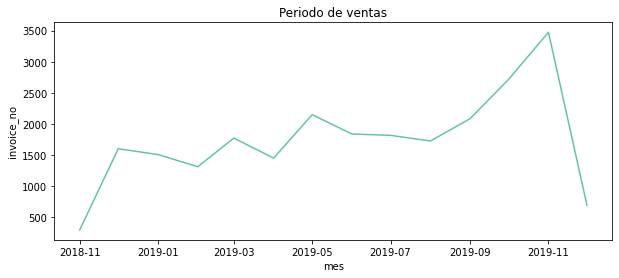

In [82]:
#Serie de tiempo mensual 
mes=dd.pivot_table(index=['mes'],values='invoice_no',aggfunc='nunique')
fig, ax = plt.subplots(figsize = (10, 4))
y=sns.lineplot(data=mes,x='mes',y='invoice_no').set(title='Periodo de ventas')
plt.show()


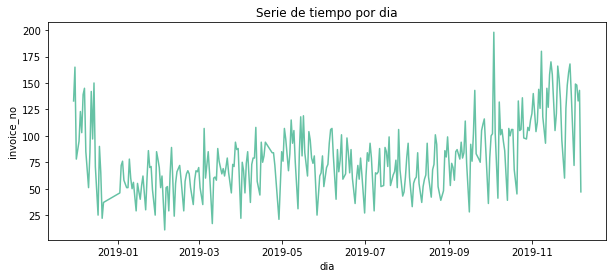

In [83]:
#Serie de tiempo por dia
serie_dia=dd.pivot_table(index=['dia',],values='invoice_no',aggfunc='nunique')
fig, ax = plt.subplots(figsize = (10, 4))
y=sns.lineplot(data=serie_dia,x='dia',y='invoice_no',ax=ax).set(title='Serie de tiempo por dia')
plt.show()

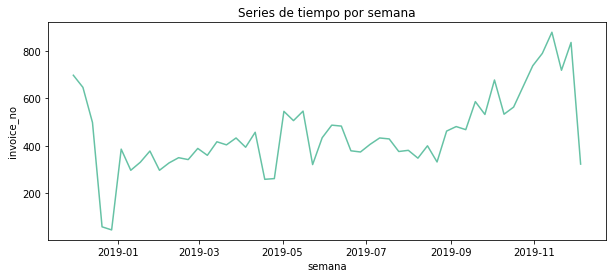

In [84]:
#Series de tiempo por semana

serie_semana=dd.pivot_table(index='semana',values='invoice_no',aggfunc='nunique')
fig, ax = plt.subplots(figsize = (10, 4))
y=sns.lineplot(data=serie_semana,x='semana',y='invoice_no',ax=ax).set(title='Series de tiempo por semana')
plt.show()

* El periodo de fechas que tenemos son desde Noviembre del 2018 a Diciembre del 2019.
* Incluimos series de tiempo por dia y por semana, a finales del 2018 tanto en la semana como en el dia a dia se registraron bajas transacciones.
* Encontramos un patron que en la iultima semana del año las transacciones disminuyen tanto en el 2018 como en el 2019 comparado con el resto de semanas durante todo el periodo.

**¿Cuantos clientes únicos tuvimos durante el periodo de tiempo dado? Traza un grafico de barras.**

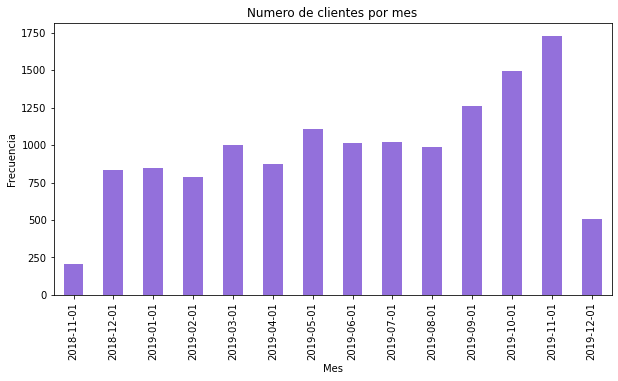

In [85]:
dd.groupby('mes')['customer_id'].nunique().plot(kind='bar',figsize=(10,5),color='mediumpurple')
plt.title('Numero de clientes por mes')
plt.xlabel('Mes')
plt.ylabel('Frecuencia')
plt.show()

* En el histograma observamos el numero de clientes unicos por cada mes y el 29 de noviembre del 2018 fueron menos de 250 clientes, siendo el mes mas bajo a lo largo del periodo.
* Por el resto de fechas se encuentran por encima de 750 clientes unicos, excepto en diciembre del 2019 que disminuye a 500.

# 1. Análisis de los productos

**1.1 ¿Cuáles son los productos más vendidos? Realiza una tabla dinámica.**



Descrubriremos cuales son los productos mas vendidos tanto en la frecuencia o el volumen de compra, como tambien en el ingreso que representa para el negocio.
Para la primera opcion tomaremos en cuenta como minimo 1000 cantidades que han sido comprados para identificar esos productos claves.

In [86]:
#Productos mas vendidos por frecuencia de compra
productos_vendidos=productos.groupby(['stock_code','description']).agg({'quantity':'sum'}).sort_values(by='quantity',ascending=False).reset_index()
productos_vendidos=productos_vendidos.query('quantity >1000')
productos_vendidos

,stock_code,description,quantity
0,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847
1,85099B,JUMBO BAG RED RETROSPOT,47363
2,84879,ASSORTED COLOUR BIRD ORNAMENT,36381
3,22197,POPCORN HOLDER,36334
4,21212,PACK OF 72 RETROSPOT CAKE CASES,36039
...,...,...,...
1222,90057,DIAMANTE RING ASSORTED IN BOX.,1008
1223,22677,FRENCH BLUE METAL DOOR SIGN 2,1007
1224,23255,CHILDRENS CUTLERY CIRCUS PARADE,1006
1225,23299,FOOD COVER WITH BEADS SET 2,1004


In [87]:
print('Numero de productos vendidos por encima de 1000 cantidades:',len(productos_vendidos))

Numero de productos vendidos por encima de 1000 cantidades: 1227


* Encotramos 1,226 productos del total de 3,946 que tuvieron cantidades por encima de 1000 durante un año aproxiadamente.
* Dado que necesitamos priorizar cuales son esos productos para enfocarnos en sacar el potencial, buscaremos los primeros 15 productos con mayores cantidades.

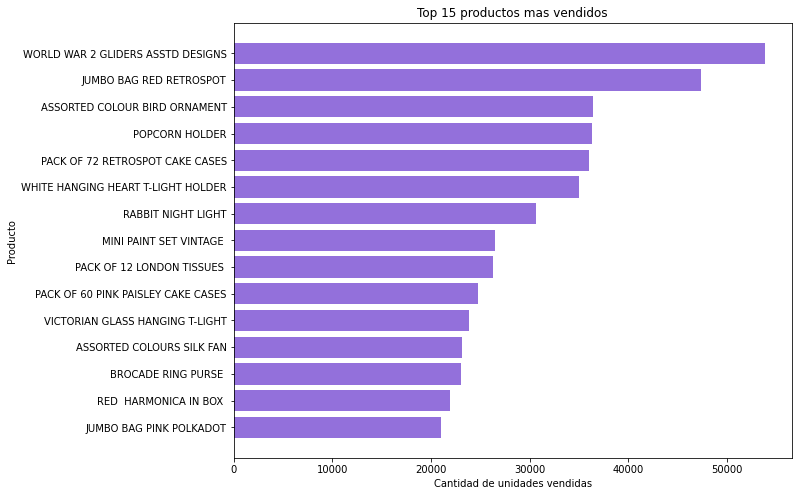

In [88]:
#Grafico top 15 
top_15=productos_vendidos.head(15)
top_15=top_15.sort_values(by='quantity',ascending=True)

plt.figure(figsize=(10, 8))
plt.barh(
    top_15['description'], top_15['quantity'], color='mediumpurple'
)
plt.xlabel('Cantidad de unidades vendidas')
plt.ylabel('Producto')
plt.title('Top 15 productos mas vendidos')
plt.show()

* Los productos mas vendidos superando las 40,000 cantidades han sido:
- WORLD WAR 2 CLIDERS 
- JUMBO BAG RED
* Dentro de nuestro top 15 , vemos que los 13 productos se distribuyen en un rango entre 20,000 a 35,000 cantidades.

**1.2 ¿Cuáles son los productos menos vendidos? Realiza una tabla dinámica**



Como encontramos productos con cantidades negativas, sera necesario hacer el analisis por 2 partes. 

La primera parte tomando en cuenta solo cantidades positivas ver los productos que menos se venden en terminos de cantidadaes facturadas de 0 a 100 cantidades. 

La segunda parte incluyendo solo cantidades negativas para ver cuales son los productos que mas se han devuelto,etc.

In [89]:
#Productos menos vendidos por frecuencia de compra
productos_menos_vendidos=productos.groupby(['description']).agg({'quantity':'sum'}).sort_values(by='quantity',ascending=True).reset_index()
productos_menos_vendidos=productos_menos_vendidos.query('quantity >0 and quantity <100')
productos_menos_vendidos

,description,quantity
173,SET 10 CARDS TRIANGLE ICONS 17220,1
174,BLUE CRYSTAL BOOT PHONE CHARM,1
175,OOH LA LA DOGS COLLAR,1
176,TEA TIME BREAKFAST BASKET,1
177,BAROQUE BUTTERFLY EARRINGS MONTANA,1
...,...,...
1466,RED ACRYLIC FACETED BANGLE,99
1467,FORKED CACTUS CANDLE,99
1468,WALL ART I LOVE LONDON,99
1469,CAROUSEL DESIGN WASHBAG,99


* Hay 1299 productos que se vendieron entre 1 y 99 cantidades durante 1 año aproxiamdamente, esto quiere decir que mensualmente se vendieron menos de 10 cantidades.


Realizaremos un grafico de distribucion por la cantidad vendida de estos productos.

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


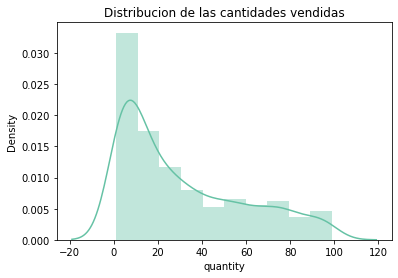

In [90]:
#Distribucion de las cantidades vendidas
sns.distplot(productos_menos_vendidos['quantity'], bins=10).set(title='Distribucion de las cantidades vendidas')
plt.show()

* En su mayoria son productos que se vendieron de 1 a 10 cantidades lo que abarca una mayor densidad en el grafico. 
* Esto quiere decir que son productos que los clientes solo han comprado una vez al año.

Segunda parte: Productos devueltos

In [91]:
#Productos devueltos 
productos_devueltos=productos.groupby(['tipo_factura','description']).agg({'quantity':'sum'}).sort_values(by='quantity',ascending=True).reset_index()
productos_devueltos=productos_devueltos.query('quantity <0')
productos_devueltos.reset_index(drop=True)

,tipo_factura,description,quantity
0,Transaccion,printing smudges/thrown away,-19200
1,Transaccion,"Unsaleable, destroyed.",-15644
2,Transaccion,check,-12030
3,Devoluciones,ROTATING SILVER ANGELS T-LIGHT HLDR,-9376
4,Transaccion,Printing smudges/thrown away,-9058
...,...,...,...
2092,Devoluciones,HAPPY STENCIL CRAFT,-1
2093,Devoluciones,BASKET OF FLOWERS SEWING KIT,-1
2094,Devoluciones,TOYBOX WRAP,-1
2095,Devoluciones,SET OF 4 ENGLISH ROSE COASTERS,-1


* 2097 productos fueron devueltos, analizaremos en el siguiente grafico la distribucion con un histograma.a

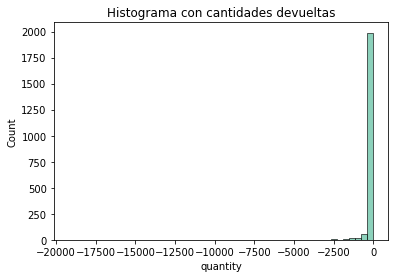

In [92]:
#Histograma de las cantidades devueltas
sns.histplot(productos_devueltos['quantity'],bins=50).set(title='Histograma con cantidades devueltas')
plt.show()

* El histograma indica que la mayoria de los productos que tuvieron cantidades negativas registradas fue de -1 a -50.
* Son menores los productos con cantidades negativas desde -1000 en adelante.


* La mayoria corresponde al tipo de devoluciones que identificamos al inicio del proyecto
* Encontramos un punto de mejora que seria que los productos devueltos si son tipo electricos, se puedan revisar el estado de calidad antes de la venta porque perjudica a la relacion con los clientes. 

**1.3 ¿Cuales son los productos con mayores y menores precios? Establece rangos según los valores mínimos y máximos**

Utilizaremos el metodo describe para obtener los datos estadisiticos para los productos previamente filtrados y un diagrama de caja.

In [93]:
#Datos estadisiticos
productos['unit_price'].describe()


count    537664.000000
mean          3.290419
std           4.562389
min           0.000000
25%           1.250000
50%           2.080000
75%           4.130000
max         649.500000
Name: unit_price, dtype: float64

Text(0.5, 0, 'Valores')

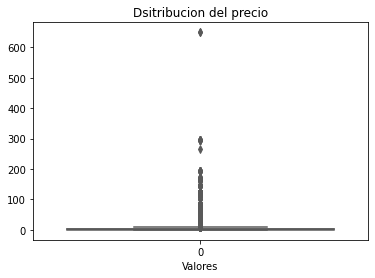

In [94]:
#Diagrama de caja precios 
sns.boxplot(data=productos['unit_price']) 
plt.title('Dsitribucion del precio')
plt.xlabel('Valores')

* En el diagrama de caja observamos que se concentran precio unitarios, fuera del extremo superior.
* La media de precios unitarios es de 3.30
* La mediana es de 2.08
* Existe un sesgo postivo en la distribucion de los precios unitarios.

Realizaremos un grafico de distribucion para los valores que se encuentren muy por encima de la media, en esta demostracion lo haremos desde 50 hasta 700 que son precio mas altos que nos interesaria vender mas.

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Distribucion de los precios')]

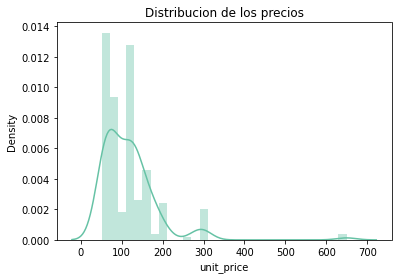

In [95]:
#Precio entre 100 y 700
precio_va=productos.query('unit_price >50 and unit_price < 700')
sns.distplot(precio_va['unit_price'],bins=30).set(title='Distribucion de los precios')

* Encontramos que hay una mayor cantidad de registros por precios de 50 y 150 aproximadamente. 
* Tambien hay registros para 200 y 300, y muy pocos que pasen de 400. 

A continuacion veremos cuales son los 20 productos con precios mas altos. Para eso eliminaremos los valores duplicados del daaframe anterior para tener producto y el precio que estan desde 50 hasta 700.

In [96]:
#Eliminacion duplicados para conocer producto unico y precio 
ppa=precio_va.drop_duplicates(subset='description')
ppa.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,dia,mes,año,semana,tipo_factura,letra_stock,ingreso
244,536392,22827,RUSTIC SEVENTEEN DRAWER SIDEBOARD,1,2018-11-29 10:29:00,165.00,13705,2018-11-29,2018-11-01,2018-01-01,2018-11-29,Transaccion,Numero,165.00
1660,536544,22769,CHALKBOARD KITCHEN ORGANISER,1,2018-11-29 14:32:00,51.02,NaN,2018-11-29,2018-11-01,2018-01-01,2018-11-29,Transaccion,Numero,51.02
2721,536592,22503,CABIN BAG VINTAGE PAISLEY,1,2018-11-29 17:06:00,59.53,NaN,2018-11-29,2018-11-01,2018-01-01,2018-11-29,Transaccion,Numero,59.53
3772,536676,21769,VINTAGE POST OFFICE CABINET,1,2018-11-30 12:18:00,79.95,16752,2018-11-30,2018-11-01,2018-01-01,2018-11-29,Transaccion,Numero,79.95
4968,536835,22655,VINTAGE RED KITCHEN CABINET,1,2018-11-30 18:06:00,295.00,13145,2018-11-30,2018-11-01,2018-01-01,2018-11-29,Transaccion,Numero,295.00


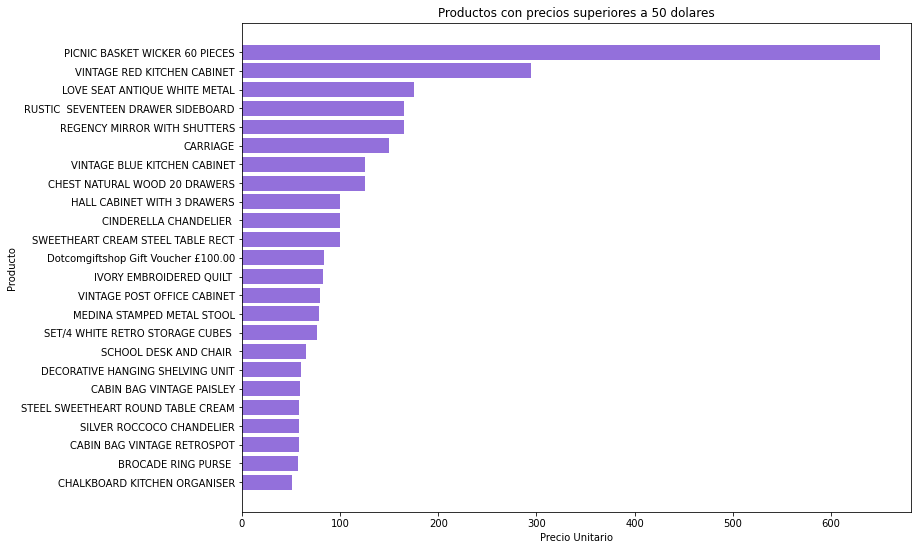

In [97]:
#Grafico de los productos con precios desde 50 hasta 700 
precio_va=ppa.sort_values(by='unit_price',ascending=True).head(24)
plt.figure(figsize=(12, 9))
plt.barh(
    precio_va['description'], precio_va['unit_price'], color='mediumpurple'
)
plt.xlabel('Precio Unitario')
plt.ylabel('Producto')
plt.title('Productos con precios superiores a 50 dolares')
plt.show()

Para conocer cuales son los productos dentro de la distribucion del diagrama de caja lo haremos por cuartles.

Primero tenemos para el cuartil 1

In [98]:
#Cuartil 1, precio hasta 1,25 
q1=productos.query('unit_price >0 and unit_price <1.26').pivot_table(index=['description','unit_price'],values='quantity',aggfunc='sum').sort_values(by='unit_price',ascending=False)
q1


,,quantity
description,unit_price,
wet boxes,1.250,0
crushed ctn,1.250,0
found box,1.250,0
JIGSAW TOADSTOOLS 3 PIECE,1.250,60
SMALL YELLOW BABUSHKA NOTEBOOK,1.250,0
...,...,...
label mix up,0.001,0
PACK OF 12 LONDON TISSUES,0.001,0
GREEN METAL BOX TOP SECRET,0.001,0


* Existen 371,624 productod que tienen un precio hasta de 1.26
* Si observamos las cantidades vendidas son 0 en su mayoria, por ejemplo para los 4 primeros productos no se han vendido a pesar de tener un precio muy bajo.


In [99]:
#Cuartil 2, precio hasta 2.08
q2=productos.query('unit_price >0 and unit_price <2.08').pivot_table(index=['description','unit_price'],values='quantity',aggfunc='sum').sort_values(by='unit_price',ascending=False)
q2


,,quantity
description,unit_price,
wet boxes,2.070,0
"TRAY, BREAKFAST IN BED",2.070,0
BLUE NEW BAROQUE CANDLESTICK CANDLE,2.070,0
VINTAGE CHRISTMAS TABLECLOTH,2.070,0
DOLLY CABINET 3 DRAWERS,2.070,0
...,...,...
PHOTO FRAME LINEN AND LACE LARGE,0.001,0
BLUE DRAGONFLY HELICOPTER,0.001,0
MODERN FLORAL STATIONERY SET,0.001,0


* Aqui observamos lo mismo no se venden unidades por esos precios.

In [100]:
#Cuartil 3, precio hasta 4.13
q3=productos.query('unit_price >0 and unit_price <4.14').pivot_table(index=['description','unit_price'],values='quantity',aggfunc='sum').sort_values(by='unit_price',ascending=False)
q3


,,quantity
description,unit_price,
wet boxes,4.130,0
SET OF 6 RIBBONS COUNTRY STYLE,4.130,0
REVOLVER WOODEN RULER,4.130,58
PLACE SETTING WHITE STAR,4.130,0
PINK LARGE JEWELED PHOTOFRAME,4.130,0
...,...,...
ELVIS WALLHANGING / CURTAIN,0.001,0
DRAWER KNOB CERAMIC IVORY,0.001,0
"ELEPHANT, BIRTHDAY CARD,",0.001,0


* Existe solo el producto PINK FAIRY CAKE que se ha venidido 40 unidades a un precio de 4.13, sin embargo para los demas vemos que sigue en 0.

Relizaremos un grafico de distribucion para los productos que abarcan su distribucion de precio hasta un 75% de acuerdo a las estadisticas y veremos cuantos son las cantidades vendidas hasta ese precio.

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


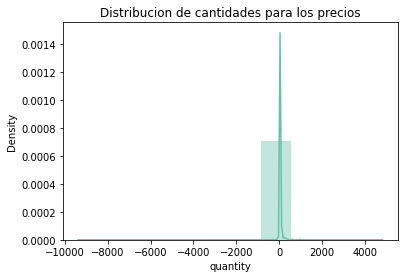

In [101]:
#Precio hasta el 75% de los datos 
precio_75=productos.query('unit_price >0 and unit_price < 4.14')
sns.distplot(precio_75['quantity'], bins=10).set(title='Distribucion de cantidades para los precios')
plt.show()

* La venta de cantidades a esos precios es muy baja, podria estimarse por los valores anteriores como maximo 60 unidades.
* De igual manera se registran mas cantidades devueltas de esos productos y tambien como valores atipicos que como habiamos visto anteriomente deben corresponder a los ajustes de deudas, comprobaremos a traves de la siguiente tabla.

In [102]:
j=dd.query('quantity <-2000')
j.tail()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,dia,mes,año,semana,tipo_factura,letra_stock
263884,560039,20713,wrongly marked. 23343 in box,-3100,2019-07-12 14:27:00,0.0,NaN,2019-07-12,2019-07-01,2019-01-01,2019-07-11,Transaccion,Numero
375429,569466,23270,incorrect stock entry.,-2880,2019-10-02 11:42:00,0.0,NaN,2019-10-02,2019-10-01,2019-01-01,2019-09-26,Transaccion,Numero
431378,573593,79323LP,"Unsaleable, destroyed.",-2618,2019-10-29 15:16:00,0.0,NaN,2019-10-29,2019-10-01,2019-01-01,2019-10-24,Transaccion,LP
431379,573594,79323P,"Unsaleable, destroyed.",-2003,2019-10-29 15:16:00,0.0,NaN,2019-10-29,2019-10-01,2019-01-01,2019-10-24,Transaccion,P
431381,573596,79323W,"Unsaleable, destroyed.",-4830,2019-10-29 15:17:00,0.0,NaN,2019-10-29,2019-10-01,2019-01-01,2019-10-24,Transaccion,W


* Comprobamos tambien que son precios 0 y que tenemos devoluciones y mas transacciones, pero si observamos la descripcion del producto nos menciona que son algunos productos dañados, destruidos o con errores en el stock.


**1.4 ¿Cuáles son los productos que mayor y menor ingresos tuvieron? Determina los productos potenciales y los que se deberían dar de baja.**

Realizaremos una grafico para observar cuales son los 20 productos con mayores ingresos recibidos durante el periodo.

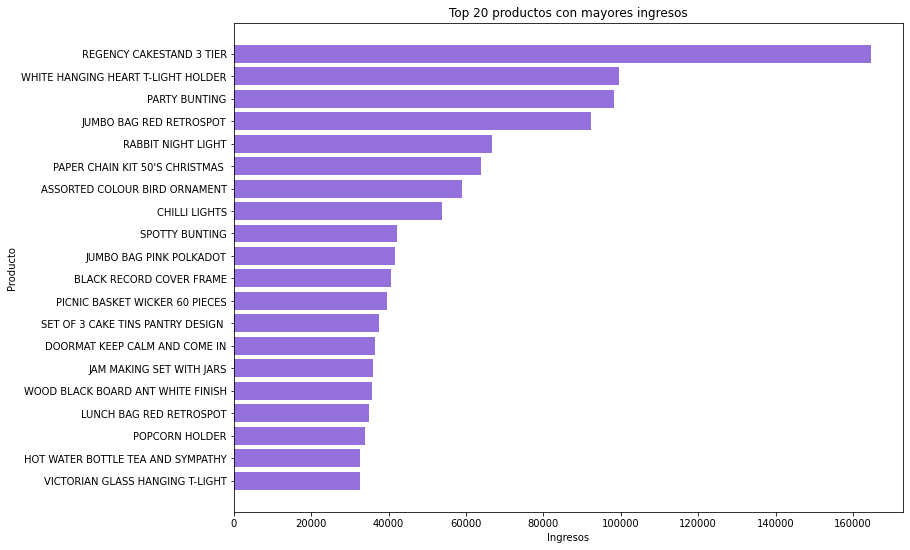

In [103]:
#Productos mas vendidos por ingreso 

productos_estrellas=productos.groupby(['description']).agg({'ingreso':'sum'}).sort_values(by='ingreso',ascending=False).reset_index()
productos_estrellas=productos_estrellas.head(20)
productos_estrellas=productos_estrellas.sort_values(by='ingreso')

precio_va=ppa.sort_values(by='unit_price',ascending=True).head(24)
plt.figure(figsize=(12, 9))
plt.barh(
    productos_estrellas['description'], productos_estrellas['ingreso'], color='mediumpurple'
)
plt.xlabel('Ingresos')
plt.ylabel('Producto')
plt.title('Top 20 productos con mayores ingresos')
plt.show()

* Se observa que el producto con mayores ingresos fue REGENCY CAKESTAND con ingresos de 160.000

In [104]:
#Productos menos vendidos por ingreso 
productos_baja=productos.groupby(['description']).agg({'ingreso':'sum'}).sort_values(by='ingreso',ascending=True).reset_index()
productos_baja=productos_baja.query('ingreso < 50')
productos_baja.reset_index()
productos_baja


,description,ingreso
0,WHITE CHERRY LIGHTS,-54.00
1,CREAM SWEETHEART MAGAZINE RACK,-46.85
2,WOODEN BOX ADVENT CALENDAR,-45.70
3,ASSORTED TUTTI FRUTTI ROUND BOX,-39.60
4,PINK CHERRY LIGHTS,-27.00
...,...,...
841,VEGETABLE MAGNETIC SHOPPING LIST,49.80
842,SET 10 CARD KRAFT REINDEER 17084,49.80
843,PURPLE AMETHYST NECKLACE W TASSEL,49.81
844,"LETTER ""M"" BLING KEY RING",49.82


* Tenemos 848 productos que han registrado ventas por menos de 50 dolares durante el año aproximadamente, esto incluye incluso los productos que se registron devoluciones.

* El negocio deberian enfocar mayores recursos de inversion y promociones en estos 20 productos principales que obtuvieron mayores ingresos y dar de baja los 848 productos que no significativos dentro de la cartera de productos.

# 2. Análisis de los clientes

**2.1 ¿Cuánto gasta en promedio cada cliente?**

In [105]:
#Columna ingresos
dd['ingresos']=dd['unit_price']*dd['quantity']

/tmp/ipykernel_67/3298221966.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dd['ingresos']=dd['unit_price']*dd['quantity']


In [106]:
#Calculo 
income_cliente = dd.groupby('customer_id')
total_gastado = income_cliente['ingresos'].sum()
compras_clientes = income_cliente['invoice_no'].count()
promedio = total_gastado/ compras_clientes

print(f"El gasto promedio de los clientes es de {round(promedio.mean())} dolares.")

El gasto promedio de los clientes es de 29 dolares.


**2.2 ¿Como es la distribucion del numero de clientes que compran por día, semana, mes y año?**

Realizaremos un grafico de linea por cada periodo.

**Día**

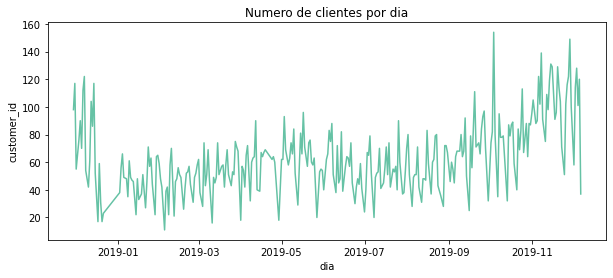

In [107]:
#Numero de clientes que compran por dia
dia=dd.pivot_table(index=['dia',],values='customer_id',aggfunc='nunique')
fig, ax = plt.subplots(figsize = (10, 4))
y=sns.lineplot(data=dia,x='dia',y='customer_id',ax=ax).set(title='Numero de clientes por dia')
plt.show()

In [108]:
#Tabla de clientes por dia
dia.sort_values(by='customer_id',ascending=False)

,customer_id
dia,
2019-10-04,154
2019-11-29,149
2019-11-08,139
2019-11-15,131
2019-11-16,129
...,...
2019-04-01,18
2018-12-20,17
2018-12-17,17


* El dia que mas se registraron mas clientes fue el 4 de octubre del 2019 con 154. 
* El 4 de febrero del 2019 fue el dia que solo tuvimos 11 clientes. 

In [109]:
print('La media del numero de clientes diarios fue de:',round(dia['customer_id'].mean()),', durante noviembre 2018 a diciembre 2019')


La media del numero de clientes diarios fue de: 63 , durante noviembre 2018 a diciembre 2019


**Semana**

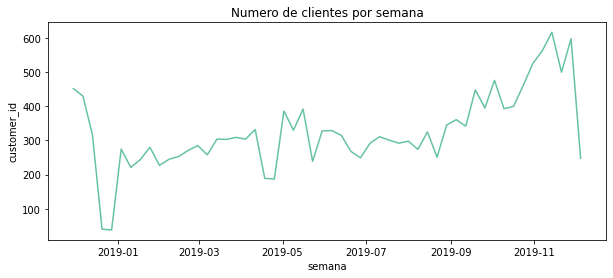

In [110]:
#Numero de clientes que compran por semana

semana=dd.pivot_table(index=['semana'],values='customer_id',aggfunc='nunique')
fig, ax = plt.subplots(figsize = (10, 4))
y=sns.lineplot(data=semana,x='semana',y='customer_id',ax=ax).set(title='Numero de clientes por semana')
plt.show()

In [111]:
#Tabla de clientes por semana
semana.sort_values(by='customer_id',ascending=False)

,customer_id
semana,
2019-11-14,617
2019-11-28,598
2019-11-07,563
2019-10-31,525
2019-11-21,500
2019-10-03,476
2019-10-24,461
2018-11-29,452
2019-09-19,448


* La semana del 14 de noviembre del 2019 fue cuando mas tuvimos mas clientes, en el 2018 la semana que mas hubieron clientes fue en la de finales de noviembre. Esto se puede deber a las festividades en esas fechas que es el dia de accion de gracias y tambien comienzos de navidad.

* Por otro lado en el grafico nos da la visibilidad que a finales del 2018 fue minimo el numero de clientes que registraron compras a lo largo de todo el periodo. Si analizamos 1 año despues de esa fecha aproximadamente el numero de clientes es mayor por encima de 200.

In [112]:
print('La media del numero de clientes semanales fue de:',round(semana['customer_id'].mean()),', durante noviembre 2018 a diciembre 2019')


La media del numero de clientes semanales fue de: 326 , durante noviembre 2018 a diciembre 2019


**Mes**

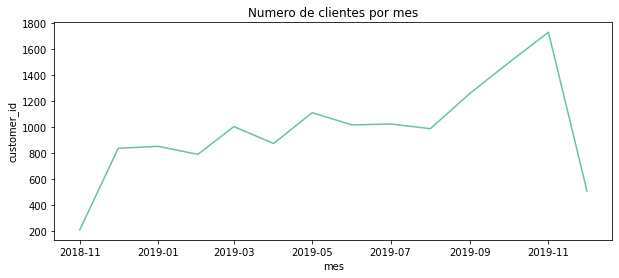

In [113]:
#Numero de clientes que compran por mes
mes=dd.pivot_table(index=['mes',],values='customer_id',aggfunc='nunique')
fig, ax = plt.subplots(figsize = (10, 4))
y=sns.lineplot(data=mes,x='mes',y='customer_id',ax=ax).set(title='Numero de clientes por mes')
plt.show()

In [114]:
#Tabla de clientes por mes
mes.sort_values(by='customer_id',ascending=False)

,customer_id
mes,
2019-11-01,1729
2019-10-01,1494
2019-09-01,1259
2019-05-01,1109
2019-07-01,1022
2019-06-01,1015
2019-03-01,1002
2019-08-01,986
2019-04-01,872


* Al analizar mensualmente, desde septiembre del 2019 tenemos un incremento con el numero de clientes hasta terminar noviembre, desde diciembre ya se ve de nuevo la baja.
* A lo largo del 2019 se ve una tendencia de 800 a 1100 clientes hasta mayo. 
* En noviembre del 2018 fue donde menos clientes tuvimos.

In [115]:
print('La media del numero de clientes mensuales fue de:',round(mes['customer_id'].mean()),', durante noviembre 2018 a diciembre 2019')


La media del numero de clientes mensuales fue de: 977 , durante noviembre 2018 a diciembre 2019


**Año**

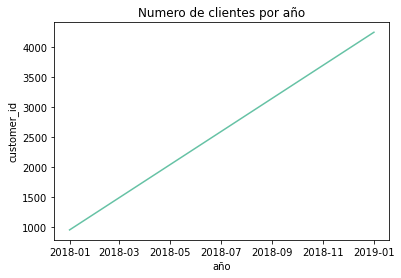

In [116]:
#Numero de clientes que compran por año
año=dd.pivot_table(index=['año',],values='customer_id',aggfunc='nunique')
y=sns.lineplot(data=año,x='año',y='customer_id').set(title='Numero de clientes por año')
plt.show()

In [117]:
#Tabla de clientes por año
año.sort_values(by='customer_id',ascending=False)

,customer_id
año,
2019-01-01,4243
2018-01-01,948


* Es muy obvio la diferencia entre los dos años, sin embargo es por que no tenemos compelto la informacion de todo el 2018 sino de los ultimos 2 meses.
* El 2019 termino con 4,343 clientes unicos.

In [118]:
print('La media del numero de clientes por año fue de:',round(año['customer_id'].mean()),', durante noviembre 2018 a diciembre 2019')


La media del numero de clientes por año fue de: 2596 , durante noviembre 2018 a diciembre 2019


**2.3 Identifica los clientes con mayor frecuencia de compra**

In [119]:
# Tabala con la frecuencia de compra por cada cliente
frecuencia_cliente= dd.groupby('customer_id').agg({'invoice_no':'nunique'}).sort_values(by='invoice_no',ascending=False)
frecuencia_cliente.head(10)

,invoice_no
customer_id,
14911,248
12748,224
17841,169
14606,128
15311,118
13089,118
12971,89
14527,86
13408,81


* Estos son los 10 clientes que tuvieron mas de 70 facturas durante todo el periodo.
* Como maximo hemos tenido un cliente con 248 facturas y solo 2 clientes con mas de 200 facturas.

Realizaremos la distribucion para el total de clientes y su frecuencia de compra.

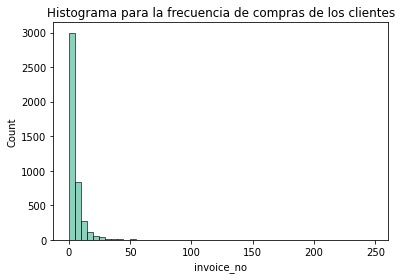

In [120]:
#Frecuencia por compras de los clientes 
frecuencia_cliente= dd.groupby('customer_id').agg({'invoice_no':'nunique'}).sort_values(by='invoice_no',ascending=False)
sns.histplot(frecuencia_cliente['invoice_no'],bins=50).set(title='Histograma para la frecuencia de compras de los clientes')
plt.show()


* Hay 3000 clientes que solo han realizado de 1 a 5 compras durante el periodo, es un dato de frecuencia muy baja y quiere decir que en cierta manera no les satisface regresar de nuevo a la tienda despues de su primera compra. El nivl de fidelizacion es muy bajo comparado con todos los clientes unicos que hemos tenido.
* Menos de 500 clientes han tenido una frecuencia de 30 compras o mas. 

**2.4 Identifica los clientes que más dinero gastaron**

Realizaremos una tabla dinamica para concoer por orden de mayor a menor los primeros 20 clientes que mas dinero gastaron.

In [121]:
#Total ingresos por cliente, top 20
total_gastado=dd.pivot_table(index='customer_id',values='ingresos',aggfunc='sum').sort_values(by='ingresos',ascending=False)
total_gastado=total_gastado.head(20)
total_gastado

,ingresos
customer_id,
14646,279489.02
18102,256438.49
17450,187482.17
14911,132572.62
12415,123725.45
14156,113384.14
17511,88125.38
16684,65892.08
13694,62653.10


* Identificamos el top 20 de clientes que han gastado mas en nuestro negocio, va desde los 36 a 279 mil durante el periodo contemplado.
* Analizaremos la distribucion del total de ingresos por estos clientes.

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


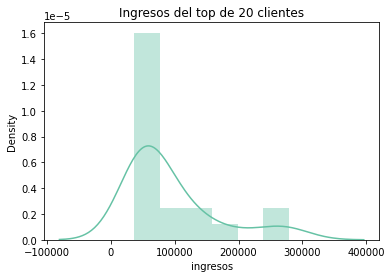

In [122]:
# Distribicion de los ingresos 
sns.distplot(total_gastado['ingresos']).set(title='Ingresos del top de 20 clientes')
plt.show()

* Los ingresos obtenidos por los clientes dentro del top 20 la mayoria fueron entre 50 y 60 mil. 
* En menos proporcion tenemos clientes que gastaron entre 80 y 160 mil. 
* Finalmente 2 clientes mas de 200 mil.

**2.5 ¿Cuantos items en total compran por cada factura?**

In [123]:
#Numero de items por factura
items=dd.query('tipo_factura !=("Devoluciones","Deudas")').pivot_table(index='invoice_no',values='description',aggfunc='count').sort_values(by='description',ascending=False)
items=items.query('description >0')
items=items.rename(columns={'description':'n_items'})
items

,n_items
invoice_no,
573585,1114
581219,749
581492,731
580729,721
558475,705
...,...
562946,1
569465,1
562948,1


* En una sola factura pueden existir compras por 1 solo item hasta 1,114 items.

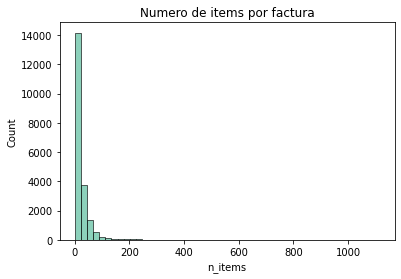

In [124]:
#Histograma por items de factura 
sns.histplot(items['n_items'],bins=50).set(title='Numero de items por factura')
plt.show()


* Tenemos 14,000 facturas unicas que se registraron de 1 a 10- 15 items. 
* Cada vez es menor el numero de facturas a media que aumentan los items, se podria decir que la mayoria de facturas se registran de 1 a 100 items por cada una.

**2.6 ¿En que horarios los clientes realizan sus compras?,observa tendencias y picos en los horarios.**

Para responder esta pregunta, necesitamos crear una columna para identificar la hora de la transaccion. 

In [125]:
#Columna con la hora 
dd['hora']=dd.invoice_date.dt.hour

/tmp/ipykernel_67/2310021382.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dd['hora']=dd.invoice_date.dt.hour


Al aplicar este metodo extreara la hora de la factura en formato de 24 horas.

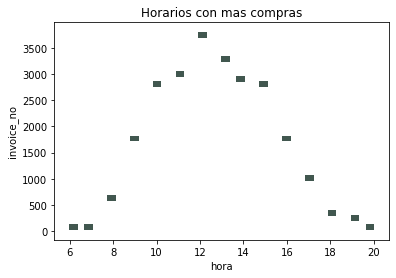

In [126]:
#Grafico de horarios con mas compras
compras=dd.pivot_table(index='hora',values='invoice_no',aggfunc='nunique')
sns.histplot(data=compras,x='hora',y='invoice_no',bins=40).set(title='Horarios con mas compras')
plt.show()

* Podemos ver que en este histograma las horas donde se registraron mas facturas fue al medio dia, registrando mas de 3,500 facturas en ese horario, aunque tambien hay una tendencia de mayores compras entre las 10 de la mañana y las 3 de la tarde. En estos horarios los clientes prefieren hacer sus compras para el hogar. 
* La forma del grafico tiene una disribucion que se asemeja a la campana de gauss con una distribucion normal.
* Los horarios en los que hay menos facturacion son a las 6 -7 de la mañana y entre las 7 y 9 de la noche. 

**2.7 Análisis de la tasa de retención de los clientes.**

In [127]:
dd['customer_id']=dd['customer_id'].astype('float')


/tmp/ipykernel_67/433194484.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dd['customer_id']=dd['customer_id'].astype('float')


Primero sacaramos en un tabla cual fue el  primer mes en el que cada cliente hizo su primera compra.

In [128]:
#Mes de la primera compra
dd=dd.reset_index(drop=True)
first_purchase = dd.groupby('customer_id').agg({'invoice_date':'min'}).reset_index()
first_purchase.columns = ['customer_id','first_purchase_month']
first_purchase['first_purchase_month'] = first_purchase['first_purchase_month'].astype('datetime64[M]')
first_purchase.head()

,customer_id,first_purchase_month
0,12347.0,2018-12-01
1,12348.0,2018-12-01
2,12349.0,2019-11-01
3,12350.0,2019-01-01
4,12352.0,2019-02-01


Ahora que ya tenemos el primer mes, haremos un merge al lado izquierdo de nuestra base de datos y alimentar con esa columna adicional.

In [129]:
#Merge del dataframe general con la tabla de first_purchase
dd = dd.merge(first_purchase, on="customer_id", how="left")
dd.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,dia,mes,año,semana,tipo_factura,letra_stock,ingresos,hora,first_purchase_month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850.0,2018-11-29,2018-11-01,2018-01-01,2018-11-29,Transaccion,A,15.30,8,2018-11-01
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850.0,2018-11-29,2018-11-01,2018-01-01,2018-11-29,Transaccion,Numero,20.34,8,2018-11-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850.0,2018-11-29,2018-11-01,2018-01-01,2018-11-29,Transaccion,B,22.00,8,2018-11-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850.0,2018-11-29,2018-11-01,2018-01-01,2018-11-29,Transaccion,G,20.34,8,2018-11-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850.0,2018-11-29,2018-11-01,2018-01-01,2018-11-29,Transaccion,E,20.34,8,2018-11-01


A continuación,obtendremos la diferencia en meses por cada registro para conocer despues de cuantos meses volvieron a hacer una compra. Dado que tenemos la información de 2 años diferentes (2018 y 2019), al resultado le sumaremos la diferencia de los años, multiplicada por 12 meses para no obtener la diferencia de meses en negativo.



In [137]:
dd['mes']=dd['mes'].astype('datetime64[M]')

In [138]:
#Cálculo en meses de la diferencia
dd["months_diff"] = dd["mes"].dt.month - dd["first_purchase_month"].dt.month
dd["months_diff"] += 12*(dd["mes"].dt.year - dd["first_purchase_month"].dt.year)
dd.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,dia,mes,año,semana,tipo_factura,letra_stock,ingresos,hora,first_purchase_month,months_diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850.0,2018-11-29,2018-11-01,2018-01-01,2018-11-29,Transaccion,A,15.30,8,2018-11-01,0.0
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850.0,2018-11-29,2018-11-01,2018-01-01,2018-11-29,Transaccion,Numero,20.34,8,2018-11-01,0.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850.0,2018-11-29,2018-11-01,2018-01-01,2018-11-29,Transaccion,B,22.00,8,2018-11-01,0.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850.0,2018-11-29,2018-11-01,2018-01-01,2018-11-29,Transaccion,G,20.34,8,2018-11-01,0.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850.0,2018-11-29,2018-11-01,2018-01-01,2018-11-29,Transaccion,E,20.34,8,2018-11-01,0.0


Realizaremos una tabla dinámica a partir de los resultados anteriores para conocer la distribución de en que meses regresan a comprar y lo representaremos en un mapa de calor.

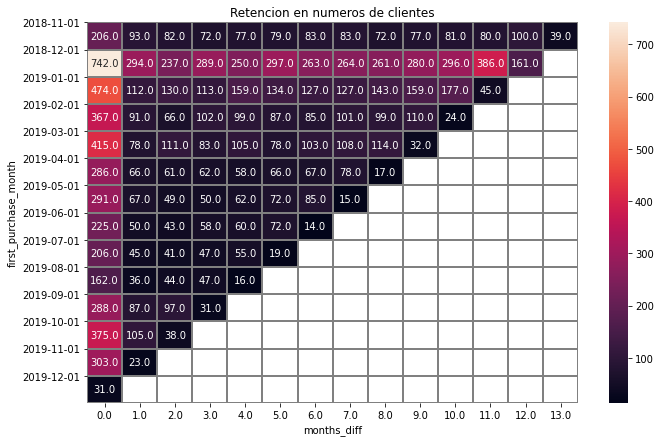

In [139]:
#Retencion en numero de clientes
dd['cohorte']= dd['customer_id'].sum()
dd['retention']=dd['customer_id']/dd['cohorte']
retention_table = dd.pivot_table(
    index="first_purchase_month",
    columns="months_diff",
    values="retention",
    aggfunc="nunique"
)
retention_table.fillna("")

plt.figure(figsize=(11, 7))
plt.title('Retencion en numeros de clientes')
sns.heatmap(
    retention_table,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='gray',
) 

plt.yticks(list(range(0,14)),retention_table.index.astype('str'))
plt.show()

* La cohorte de Diciembre del 2018 es donde tuvimos mayor numero de clientes que hicieron su primera compra, exactamente 742. Quiza sea por el tema de festividades y porque a lo mejor desde ese periodo se inaguro la tienda en linea y por eso tuvimos los primeros clientes.

* Esa cohorte de diciembre del 2018 fue la que tuvo mayor retencion comparado con el resto de cohortes. Exactamente en el onceavo mes tuvimos un mayor numero de clientes de regreso.

* A medida que pasa el tiempo , son menos usuarios que hacen su primera compra llegando a un minimo de 162 en Agosto del 2018.



En este paso a continuación  realizaremos la división del número de usuarios por cada mes sobre el mes 0 que nos indica el total de usuarios que compraron por primera vez. De esta manera obtendremos los porcentajes por cada mes y será más fácil identificar la tasa para cada cohorte y en que meses es más frecuente el regreso de compra.

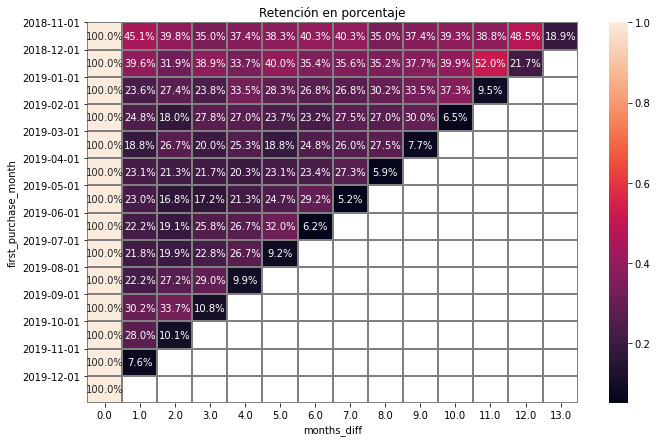

In [140]:
#Retencion de los cleintes en porcentajes
retention_rates = retention_table
for col in retention_rates.columns[1:]:
    retention_rates[col] = retention_rates[col] / retention_rates[0]

retention_rates[0] = retention_rates[0]/retention_rates[0]

retention_rates.fillna("")

plt.figure(figsize=(11, 7))
plt.title('Retención en porcentaje')
sns.heatmap(
    retention_rates,
    annot=True,
    fmt='.1%',
    linewidths=1,
    linecolor='gray', vmax=1
) 

plt.yticks(list(range(0,14)),retention_table.index.astype('str'))
plt.show()

* En términos de porcentaje podemos ver al siguiente mes de haber hecho su primera compra en todas las cohortes es muy bajo el porcentaje de retencion, solo encontramos entre un 20% y 45% de clientes. 
* En las cohortes del 2018 son las que mayor retencion tuvimos comparado con el resto de los meses del 2019. 
* Un 52% de los clientes de la cohorte de diciembre del 2018 regresaron a acomprar en noviembre, es decir casi al año. * En las cohortes del 2019, tienden a regresar mas porcentaje de clientes al cuarto o septimo mes.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo en esta sección.
</div>

**2.8 Analisis de LTV de los clientes**

Primero crearemos un dataframe a partir de la agrupacion del primer mes de compra y contaremos el numero unico de clientes.

In [141]:
#Analisis LTV
cohort_sizes=first_purchase.groupby('first_purchase_month').agg({'customer_id':'nunique'}).reset_index().rename(columns={'customer_id': 'n_buyers'})
cohort_sizes.head()

,first_purchase_month,n_buyers
0,2018-11-01,206
1,2018-12-01,742
2,2019-01-01,474
3,2019-02-01,367
4,2019-03-01,415


Crearemos otro dataframe para agrupar y tener en las dos columnas el mes de la primera compra y el mes de la compra, tambien sumaremos el total de ingresos percibidos.

In [142]:
#Analisis LTV
cohorts = dd.groupby(['first_purchase_month', 'mes']).agg({'ingresos':'sum'}).reset_index()
cohorts.head()

,first_purchase_month,mes,ingresos
0,2018-11-01,2018-11-01,91826.69
1,2018-11-01,2018-12-01,92306.52
2,2018-11-01,2019-01-01,88160.40
3,2018-11-01,2019-02-01,60883.23
4,2018-11-01,2019-03-01,84791.89


Realizaremos un merge entre los 2 dataframes para tener tambien el numero de clientes.

In [143]:
#Analisis LTV
report_ltv = pd.merge(cohort_sizes, cohorts, on='first_purchase_month')
report_ltv.head()

,first_purchase_month,n_buyers,mes,ingresos
0,2018-11-01,206,2018-11-01,91826.69
1,2018-11-01,206,2018-12-01,92306.52
2,2018-11-01,206,2019-01-01,88160.40
3,2018-11-01,206,2019-02-01,60883.23
4,2018-11-01,206,2019-03-01,84791.89


Ahora que ya tenemos la informacion necesaria, procedemos a crear la columna de age, que nos dira la diferencia en meses de cuando fue la ultima compra vs la primera que hizo. 

In [144]:
#Analisis LTV
report_ltv['age'] = (
    report_ltv['mes'] - report_ltv['first_purchase_month']
) / np.timedelta64(1, 'M')

report_ltv['age'] = report_ltv['age'].round().astype('int')

report_ltv.head()

,first_purchase_month,n_buyers,mes,ingresos,age
0,2018-11-01,206,2018-11-01,91826.69,0
1,2018-11-01,206,2018-12-01,92306.52,1
2,2018-11-01,206,2019-01-01,88160.40,2
3,2018-11-01,206,2019-02-01,60883.23,3
4,2018-11-01,206,2019-03-01,84791.89,4


Ahora procedemos a crear la columna de LTV, que es el ingreso que nos trae cada cliente en cada cohorte y por la diferencia en meses.

In [145]:
#Analisis LTV
report_ltv['ltv'] = report_ltv['ingresos'] / report_ltv['n_buyers']

output = report_ltv.pivot_table(
    index='first_purchase_month', columns='age', values='ltv', aggfunc='mean'
).cumsum(axis=1).round(2)

output.fillna('') 

age,0,1,2,3,4,5,6,7,8,9,10,11,12,13
first_purchase_month,,,,,,,,,,,,,,
2018-11-01,445.76,893.85,1321.81,1617.36,2028.97,2279.73,2698.84,3108.32,3573.8,4021.19,4589.2,5213.97,6021.89,6236.0
2018-12-01,499.29,776.2,997.01,1281.31,1473.5,1813.16,2103.85,2385.43,2726.61,3146.67,3601.15,4081.61,4210.79,
2019-01-01,473.00,595.95,736.02,836.85,1043.81,1212.06,1374.87,1559.67,1720.21,1970.79,2253.01,2297.61,,
2019-02-01,413.68,485.18,568.64,688.08,775.62,864.91,972.76,1110.37,1237.77,1391.71,1404.75,,,
2019-03-01,418.97,475.32,614.48,701.82,820.81,923.12,1055.95,1216.88,1361.35,1380.04,,,,
2019-04-01,397.30,485.34,563.85,636.1,711.52,804.48,901.83,1012.31,1026.28,,,,,
2019-05-01,415.21,477.76,546.01,605.44,700.91,820.51,951.0,968.31,,,,,,
2019-06-01,391.57,457.61,514.48,640.07,755.81,924.49,943.34,,,,,,,
2019-07-01,401.73,455.49,537.1,630.04,731.65,756.02,,,,,,,,


Realizamos un grafico de mapa de calor para observar el LTV por colores en cada cohorte.

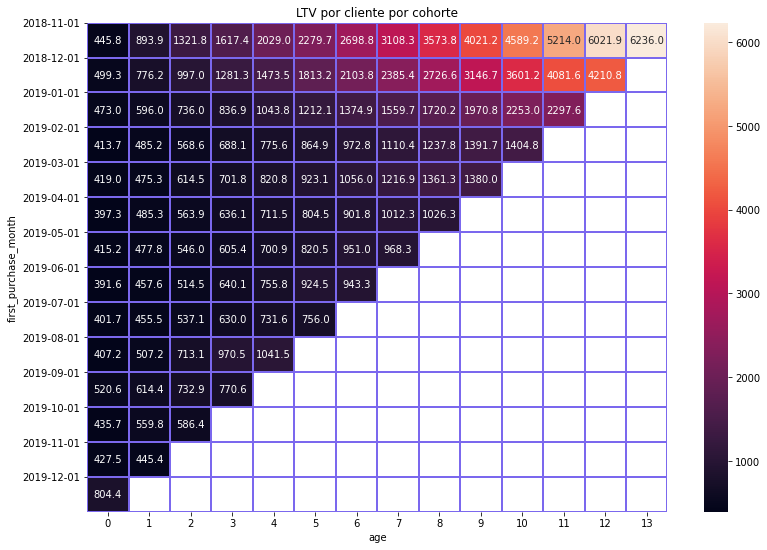

In [146]:
#Analisis LTV
plt.figure(figsize=(13, 9))
plt.title('LTV por cliente por cohorte')
sns.heatmap(
 output,
 annot=True,
 fmt='.1f',
 linewidth=1,
 linecolor='mediumslateblue'
)

plt.yticks(list(range(0,14)),output.index.astype('str'))
plt.show()

* La cohorte de clientes que hicieron la primera compra en noviembre del 2018 fueron los que alcanzaron un mayor ltv despues de 1 año y 1 mes con 6,236.
* A medida que van pasando los meses de la diferencia de su primera compra y la ultima, vemos que el ltv va aumentando en todas las cohortes. Esto quiere decir que el nivel de compras incrementaban con el tiempo, quiza el cliente sentia mas confianza y por eso gastaba mas.
* El ltv se ve que tiene mayor retorno en el largo plazo a partir de los 6 meses aproximadamente.

**2.9 Analisis de compra promedio por mes por cohorte**

Finalmente tambien nos interesa conocer la compra promedio por mes en cada cohorte, por lo que primero agruparemos por la fecha del primer mes de compra y las cantidades compradas.

In [147]:
#Analisis de compra promedio
cohorts_ = dd.groupby(['first_purchase_month', 'mes']).agg({'quantity':'sum'}).reset_index()
cohorts_.head()

,first_purchase_month,mes,quantity
0,2018-11-01,2018-11-01,44887
1,2018-11-01,2018-12-01,51630
2,2018-11-01,2019-01-01,49055
3,2018-11-01,2019-02-01,40741
4,2018-11-01,2019-03-01,54229


Aplicamos un merge para conocer tambien el numero de clientes que sacamos en la seccion anterior.

In [148]:
#Analisis de compra promedio
report_purchase= pd.merge(cohort_sizes, cohorts_, on='first_purchase_month')
report_purchase.head()

,first_purchase_month,n_buyers,mes,quantity
0,2018-11-01,206,2018-11-01,44887
1,2018-11-01,206,2018-12-01,51630
2,2018-11-01,206,2019-01-01,49055
3,2018-11-01,206,2019-02-01,40741
4,2018-11-01,206,2019-03-01,54229


Realizamos el calculo de la compra promedio, dividiendo el total de items comprados por el numero de clientes. 
Adicional volvemos a calcular el age con la diferencia de los meses.

In [149]:
#Analisis de compra promedio
report_purchase['compra_promedio'] = report_purchase['quantity'] / report_purchase['n_buyers']
report_purchase['age'] = (
    report_purchase['mes'] - report_purchase['first_purchase_month']
) / np.timedelta64(1,'M')
report_purchase['age'] = report_purchase['age'].round().astype('int')

report_purchase.head()

,first_purchase_month,n_buyers,mes,quantity,compra_promedio,age
0,2018-11-01,206,2018-11-01,44887,217.898058,0
1,2018-11-01,206,2018-12-01,51630,250.631068,1
2,2018-11-01,206,2019-01-01,49055,238.131068,2
3,2018-11-01,206,2019-02-01,40741,197.771845,3
4,2018-11-01,206,2019-03-01,54229,263.247573,4


Procedemos a crear el mapa de calor.

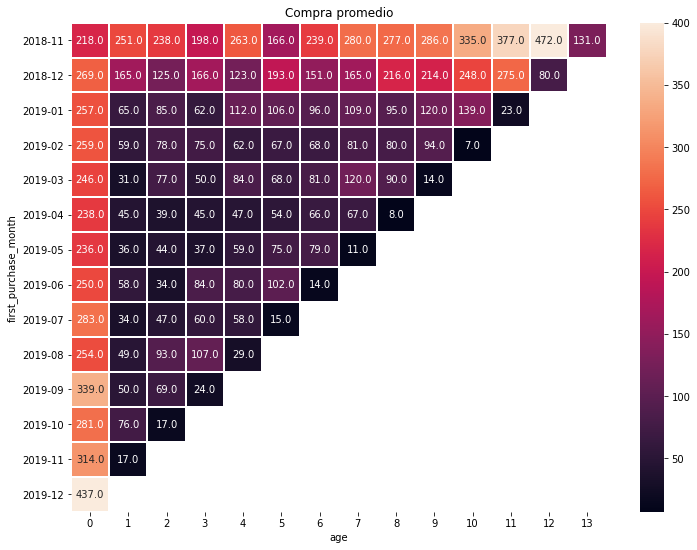

In [150]:
#Analisis de compra promedio
output_ = report_purchase.pivot_table(
    index='first_purchase_month', columns='age', values='compra_promedio', aggfunc='mean'
).round()

plt.figure(figsize=(12, 9))
plt.title('Compra promedio')
sns.heatmap(
    output_,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='white',
    vmax=400,
    yticklabels=output.index.strftime('%Y-%m'),
)
plt.show()


* El promedio de compra por la cohorte de noviembre y diciembre del 2018 son las unicas que tienen un aumento a lo largo de los meses, es decir que ese grupo si continuo realizando mayores volumnes de compra incluso llegando al maximo de 472 despues de 12 meses. 
* Las otras cohortes desde el 2019 el promedio de compra tambien ha aumentando pero no ha sido en la misma magnitud como fueron en el 2018. 

# 3. Análisis de los ingresos

**3.1 Analiza y grafica las ventas totales a través del tiempo.¿En que periodo se facturó más?**

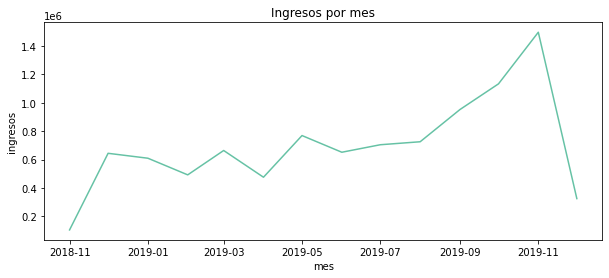

In [151]:
ingresos_por_mes=dd.pivot_table(index=['mes'],values='ingresos',aggfunc='sum').sort_values(by='mes',ascending=True)
fig, ax = plt.subplots(figsize = (10, 4))
sns.lineplot(data=ingresos_por_mes,x='mes',y='ingresos',ax=ax).set(title='Ingresos por mes')
plt.show()

In [152]:
#Tabla con los ingresos por mes 
ingresos_por_mes.sort_values(by='ingresos',ascending=False)

,ingresos
mes,
2019-11-01,1496272.650
2019-10-01,1133061.700
2019-09-01,952269.532
2019-05-01,769062.060
2019-08-01,725412.070
2019-07-01,704438.401
2019-03-01,663890.700
2019-06-01,651601.730
2018-12-01,644114.180


* El mes donde mas ingresos obtuvimos fue en noviembre del 2019 alcanzando un pico muy notorio comparado con el resto de los meses un valor de 1,490.608 dolares.
* La razon tambien viene por lo visto anteriormente, que en ese mes tuvimos el mayor numero de clientes unicos registrados.
* En noviembre del 2018 fue  el mes con menores ingresos con 104,539 y corresponde tambien que tuvimos menos clientes en ese mes seguramente por lo que fue el comienzo del negocio.

**3.2 Demuestra graficamente la estacionalidad de los productos vendidos, ¿existen productos que se venden mas en meses especificos?**

En base a los productos estrellas identificados anteriormente, analizaremos los 10 primeros productos con mayores ingresos para visualizar en que epoca del año tuvieron mayores ingresos y poder sacar conclusiones dependiendo del tipo de producto.

In [153]:
#Top 10 productos estrellas
productos_estrellas10=productos_estrellas.tail(10).reset_index(drop=True)
productos_estrellas10

,description,ingreso
0,JUMBO BAG PINK POLKADOT,41619.66
1,SPOTTY BUNTING,42065.32
2,CHILLI LIGHTS,53768.06
3,ASSORTED COLOUR BIRD ORNAMENT,58959.73
4,PAPER CHAIN KIT 50'S CHRISTMAS,63791.94
5,RABBIT NIGHT LIGHT,66756.59
6,JUMBO BAG RED RETROSPOT,92356.03
7,PARTY BUNTING,98302.98
8,WHITE HANGING HEART T-LIGHT HOLDER,99668.47
9,REGENCY CAKESTAND 3 TIER,164762.19


Dado que en nuestra tabla de productos estrellas solo teniamos identificado el ingreso y el producto, realizaremos un merge para obtener los datos de los meses. Dejaremos solo las 3 columnas que nos interesan, description, mes e ingresos.

In [154]:
# Merge 
estacionalidad=dd.merge(productos_estrellas10,how='right',on='description')
estacionalidad[['description','mes','ingresos']]

,description,mes,ingresos
0,JUMBO BAG PINK POLKADOT,2018-11-01,19.50
1,JUMBO BAG PINK POLKADOT,2018-11-01,1.95
2,JUMBO BAG PINK POLKADOT,2018-11-01,58.50
3,JUMBO BAG PINK POLKADOT,2018-11-01,1.95
4,JUMBO BAG PINK POLKADOT,2018-11-01,12.63
...,...,...,...
15314,REGENCY CAKESTAND 3 TIER,2019-12-01,12.75
15315,REGENCY CAKESTAND 3 TIER,2019-12-01,12.75
15316,REGENCY CAKESTAND 3 TIER,2019-12-01,25.50
15317,REGENCY CAKESTAND 3 TIER,2019-12-01,127.50


<AxesSubplot:title={'center':'Estacionalidad de ventas por el top 10/productos'}, xlabel='mes', ylabel='Ingresos'>

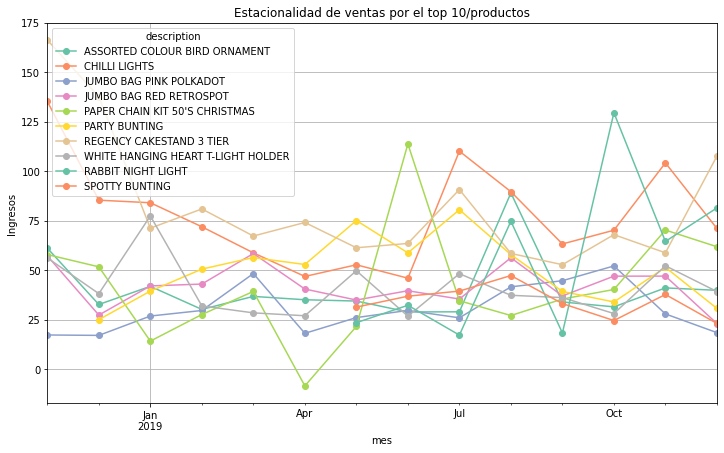

In [155]:
#Grafico de estacionalidad
grafico_p=estacionalidad.pivot_table(index='mes',columns='description',values='ingresos').plot(style='o-',figsize=(12,7),grid=True,title='Estacionalidad de ventas por el top 10/productos',ylabel='Ingresos')
grafico_p

* Los productos que tienen picos y bajos notorios durante el año es:
- PAPER CHAIN KIT 50S CHRISTMAS especificamente en abril registra el menor nivel de las ventas, sin  embargo en junio registra un pico alto llegando casi a 125.  Por el contrario en diciembre tanto del 2018 y 2019 sus ventas son menores 
- CHILLI LIGHTS empezo con un nivel alto de ventas en noviembre del 2018 y en julio y novimebre del 2019 otra vez tiene picos en sus ingresos, seguramente se debe a las festividades de dia de gracias y la independencia
- RABBIT NIGHT LIGHT no tuvo ingresos durante los primeros 6 meses, seguramente recien se incluyo dentro del portafolio de productos despues. En noviembre y octubre alcanza picos de 100 y 130, seguramente fueron mas demandados por la temoporada de halloween. 
- REGENCY CAKESTAND fue el producto con mayores ingresos durante todo el periodo, tuvo un pico de ventas historico que fue en noviembre del 2018 superando los 150 en ese mes, sin embargo en enero se ve una baja considerable y durante el 2019 se mantiene estable y en julio tiene un pico tambien pero por menos de 100. Un año despues ennoviembre del 2019 registro ventas mucho menores al del año anterior.


**3.3 ¿En que horario en promedio se registran mayores ingresos?**

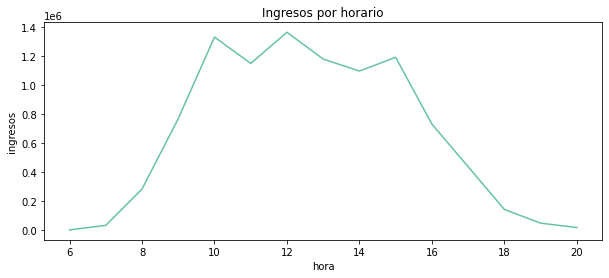

In [156]:
#Grafico ingresos por horario 
ingreso_horario=dd.pivot_table(index='hora',values='ingresos',aggfunc='sum').sort_values(by='hora',ascending=True)
fig, ax = plt.subplots(figsize = (10, 4))
sns.lineplot(data=ingreso_horario,x='hora',y='ingresos',ax=ax).set(title='Ingresos por horario')
plt.show()

* Los ingresos son mas altos entre las 10am, al medio dia y hasta las 3 de la tarde. Que corresponde al grafico anterior con el mayor numero de facturas en esos horarios. 
* A medida que arranca el dia los ingresos son bajos, pero al pasar las horas va aumentando hasta llegar a un climax y desde las 3 de la tarde en adelante ya va diminuyendo el nivel de ingresos. 

**3.4 Estudia y grafica la correlacion entre precio y cantidad.**

Imprimiremos la matriz de correlacion pero para los 10 productos estrellas para observar que otras variables podemos tomar en cuenta para el analisis.

In [157]:
#Matriz de correlacion 
estacionalidad.corr()

,quantity,unit_price,customer_id,ingresos,hora,months_diff,cohorte,retention,ingreso
quantity,1.000000,-0.098935,-0.026290,0.854586,-0.032790,0.061174,NaN,-0.026290,-0.054025
unit_price,-0.098935,1.000000,-0.069573,0.058941,0.049470,-0.091829,NaN,-0.069573,0.691715
customer_id,-0.026290,-0.069573,1.000000,-0.020590,0.034579,-0.013584,NaN,1.000000,-0.050675
ingresos,0.854586,0.058941,-0.020590,1.000000,-0.036692,0.050952,NaN,-0.020590,0.054598
hora,-0.032790,0.049470,0.034579,-0.036692,1.000000,-0.006515,NaN,0.034579,-0.004883
months_diff,0.061174,-0.091829,-0.013584,0.050952,-0.006515,1.000000,NaN,-0.013584,-0.125704
cohorte,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
retention,-0.026290,-0.069573,1.000000,-0.020590,0.034579,-0.013584,NaN,1.000000,-0.050675
ingreso,-0.054025,0.691715,-0.050675,0.054598,-0.004883,-0.125704,NaN,-0.050675,1.000000


* Podemos ver que existe una correlacion muy debil y negativa entre el precio unitario y la cantidad, el coeficiente de pearson nos indica -0.099. Al ser negativa indica que hay una ligera y debidl tendencia que si el unit_pirce es mas alto la cantidad de articulos comprados sera menor, realizaremos a continuacion un grafico de correlacion para observar la tendencia.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


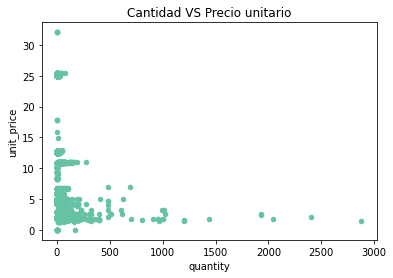

In [158]:
#Grafico de correlación
correlacion_top_10=estacionalidad[['description','quantity','unit_price']]
correlacion_top_10.query('quantity>0').plot(kind='scatter',x='quantity',y='unit_price',title='Cantidad VS Precio unitario')
plt.show()

* Tal como nos indicaba el coeficiente, la tendencia negativa es muy debil, sin emargo podemos rescatar que a medida que aumenta la cantidad el precio unitario baja.
* Incluso se muestran los valores mas alejados, es decir que se vendieron cantidades mayores a 1000 por el precio de 3 dolares, por otro lado la mayoria de clientes compraron entre 1 a 300 unidades. 
* Si vemos el valor maximo del precio indica que a un valor de 25 las cantidades compradas fueron minimas.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo.
</div>

# 4. Prueba de hipótesis




Hipotesis 1

**Ho= Los ingresos promedio de los productos mas vendidos en diciembre de 2018 y diciembre 2019 son iguales.**

**H1= Los ingresos promedio de los productos mas vendidos en diciembre de 2018 y diciembre 2019 son diferentes.**

Primero filtraremos del dataframe anterior de estacionalidad en 2 diferetes tablas para cada mes y año para tener la columna del ingreso.

In [159]:
#Diciembre 2018, Diciembre2019
ingreso_dic_2018=estacionalidad.query('mes== "2018-12-01"')
ingreso_dic_2018=ingreso_dic_2018['ingreso']
ingreso_dic_2019=estacionalidad.query('mes== "2019-12-01"')
ingreso_dic_2019=ingreso_dic_2019['ingreso']

Utilizaremos el metodo de Levene que sirve para comprobar la hipótesis nula de que las muestras que se van a comparar proceden de una población con la misma varianza. 


In [160]:
#Prueba de Levene
significance=0.05
stat, p = levene(ingreso_dic_2018, ingreso_dic_2019)
print('El valor de p para la prueba de Levene es:', p)
print()
if p < significance:
    print('Rechazamos nuestra hipótesis nula: hay una diferencia significativa entre las varianzas de los dos conjuntos.')
else:
    print('No rechazamos nuestra hipótesis nula: no hay razones para pensar que las varianzas son diferentes.')

El valor de p para la prueba de Levene es: 3.140994409685295e-06

Rechazamos nuestra hipótesis nula: hay una diferencia significativa entre las varianzas de los dos conjuntos.


Prueba de las medias

In [161]:
#Promedios de las 2 listas
print('Promedio de ingresos en diciembre del 2018:', ingreso_dic_2018.mean())
print('Promedio de ingresos en diciembre del 2019:', ingreso_dic_2019.mean())

Promedio de ingresos en diciembre del 2018: 94079.94817059471
Promedio de ingresos en diciembre del 2019: 80885.57577726225


In [162]:
#Prueba de las medias
alpha= 0.05
results= st.ttest_ind(ingreso_dic_2018, ingreso_dic_2019, equal_var = False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula, existe una diferencia significativa entre los ingresos promedios")
    
else:
    print("No rechazamos la hipótesis nula, no existe motivos de que los ingresos promedio sean diferentes")

p-value: 5.518005338941679e-10
Rechazamos la hipótesis nula, existe una diferencia significativa entre los ingresos promedios


* A través del método de Levene, el valor p indica que al ser menor que el nivel de significancia se debe rechazar que las varianzas poblacionales son iguales y se concluye que si hay diferencias entre las variaciones de la población.

* En la prueba de medias el valor p es menor al nivel de significancia por lo tanto se rechaza la hipótesis de que los ingresos promedio en diciembre del 2018 son diferentes a diciembre del 2019. 



Hipotesis 2

**H0: Los ingresos promedio de la jornada de la mañana y de la tarde son iguales**

**H1: Los ingresos promedio de la jornada de la mañana y de la tarde son diferentes**

Realizaremos el filtro de las tablas por los horarios que nos interesa


In [163]:
#Ingresos de la jornada de la mañana de 6 am a 11 am
ingreso9=dd.query('hora <12')
ingreso9=ingreso9['ingresos']
ingreso9

0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
540268    14.85
540269    25.00
540270    15.90
540271    19.80
540272    18.00
Name: ingresos, Length: 150003, dtype: float64

In [164]:
#Ingresos jornada de tarde desde el 12pm hasta las 6 pm
ingreso12=dd.query('hora >=12 and hora <=18')
ingreso12=ingreso12['ingresos']
ingreso12

687       15.00
688       15.00
689       15.00
690       17.70
691       15.00
          ...  
540446    10.20
540447    12.60
540448    16.60
540449    16.60
540450    14.85
Name: ingresos, Length: 385872, dtype: float64

Utilizaremos el mismo metodo de Levene para la prueba de varianzas


In [165]:
significance=0.05
stat, p = levene(ingreso9, ingreso12)
print('El valor de p para la prueba de Levene es:', p)
print()
if p < significance:
    print('Rechazamos nuestra hipótesis nula: hay una diferencia significativa entre las varianzas de los dos conjuntos.')
else:
    print('No rechazamos nuestra hipótesis nula: no hay razones para pensar que las varianzas son diferentes.')

El valor de p para la prueba de Levene es: 2.2479197768148728e-42

Rechazamos nuestra hipótesis nula: hay una diferencia significativa entre las varianzas de los dos conjuntos.


In [166]:
#Promedios de las 2 listas
print('Promedios:')
print('Promedio de ingresos en la mañana:', ingreso9.mean())
print('Promedio de ingresos en la tarde:', ingreso12.mean())

Promedios:
Promedio de ingresos en la mañana: 23.70340141197176
Promedio de ingresos en la tarde: 15.885633712733757


In [167]:
#Prueba de las medias
alpha= 0.05
results= st.ttest_ind(ingreso9, ingreso12, equal_var = False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula, existe una diferencia significativa entre los ingresos promedios")
    
else:
    print("No rechazamos la hipótesis nula, no existe motivos de que los ingresos promedio sean diferentes")

p-value: 2.017416489187545e-97
Rechazamos la hipótesis nula, existe una diferencia significativa entre los ingresos promedios


* Existieron diferencias entre las variaciones de la población.
* Los ingresos promedios entre la jornada de la mañana y de la tarde tienen una diferencia estadisticamente significativa, como vimos los resultados el promedio de ingresos en la mañana fue de 23 y en la tarde de de 15.
* Cuando  analizamos la grafica anterior de ingresos por horarios, el medio dia obtuvo muchos mas ingresos, pero se puede complmentar que seguramente fue porque habian muchas mas personas comprando en ese horario pese a que los ingresos promedios fueron menores que el de las 9 am.

# 5.Conclusiones y Recomendaciones


**Conclusiones:**

* Los valores ausentes de descripcion del producto representaron un 0,27% asi que fueron eliminados.
* Eliminamos las cantidades que eran atipicos tanto positivos como negativos.
* El periodo de analisis contempló desde noviembre del 2018 a diciembre del 2019 donde encontramos 3,945 productos en el portfaolio y por encima de 750 clientes unicos cada mes desde diciembre 2018 a noviembre del 2019.
* Los productos mas vendidos superando las 40,000 cantidades han sido:
   - WORLD WAR 2 CLIDERS 
   - JUMBO BAG RED
* Dentro de nuestro top 15 , vemos que los 13 productos se distribuyen en un rango entre 20,000 a 35,000 cantidades.

* Los ingresos obtenidos por los clientes dentro del top 20 la mayoria fueron entre 50 y 60 mil.
* Tenemos 14,000 facturas unicas que se registraron de 1 a 10- 15 items.Cada vez es menor el numero de facturas a media que aumentan los items, se podria decir que la mayoria de facturas se registran de 1 a 100 items por cada una.
* La mayoria de los clientes prefieren hacer sus compras entre las 10 am y 3 pm, pero hay mayor trafico de clientes al medio dia.
* No hay una alta fidelizacion del cliente despues de 1 mes de su compra, ya que en el analisis de retencion  en todas las cohortes es muy bajo el porcentaje de retencion, solo encontramos entre un 20% y 45% de clientes que retornan.
* En la cohorte de diciembre del 2018 fue la que tuvo mayor retencion comparado con el resto de cohortes. Exactamente en el onceavo mes tuvimos un tasa de retencion del 52%.
* El nivel de compra promedio aumenta para todas las cohorte a medida del tiempo, pero los clientes que hicieron su primera compra en noviembre y diciembre del 2018 fueron los que mayores resultados alcanzaron. 
* En el grafico de LTV con el mapa de calor sacamos la conclusion de que a medida que pasa mas tiempo los clientes gastan mas, esto puede ser debido al nivel de confianza y lealtad que no es en el corto plazo.

* El mes donde mas ingresos obtuvimos fue en noviembre del 2019 alcanzando un pico muy notorio comparado con el resto de los meses un valor de 1,490.608 dolares.

* Hubo una correlacion muy debil y negativa entre el precio unitario y la cantidad de acuerdo al coeficiente de pearson nos indica -0.099. 

* Se rechazó la hipótesis de que los ingresos promedio en diciembre del 2018 son diferentes a diciembre del 2019.

* Los ingresos promedios entre la mañana y la tarde tienen una diferencia estadisticamente significativa. Por lo tanto se rechazo la hipotesis nula.

**Recomendaciones:**

* El negocio deberian enfocar mayores recursos de inversion y promociones en los 20 productos principales identificados  que obtuvieron mayores ingresos y dar de baja los 848 productos que no significativos dentro de la cartera de productos que incluia ventas menores a 50 dolares y los que tenian mayor numero de devoluciones.

* Lanzar promociones digitales entre las 10 y 3 de la tarde en el sitio web dado que en ese horario es donde hay mas flujo de clientes que estan comprando y esto puede aumentar mucho mas las ventas. 

* El negocio deberia contar con un equipo de revision de calidad de los productos, dado que tuvimos un gran numero de devoluciones y adicional en las transacciones se reflejaban productos danados, desechados, etc. Es por eso que la tasa de retencion fue baja para todas las cohortes que hicieron su primera compra y se debe tambien a la mala experiencia que pudieron pasar por devolver los productos que no funcionaban o tenian un desperfecto.

**Fuentes de consulta:**

Las siguientes fuentes de consultas en articulos, sitios web, etc fueron de gran utilidad para completar el proyecto. 
Desde entender y ver el alcance o recomendaciones al momento de hacer la limpieza de los datos, revisar valores ausentes, como mostrar los valores duplicados y los metodos para eliminar los segundos valores duplicados de las filas. De igual manera en el analisis exploratorio fue importante esta fuente de consulta para sacar ideas en la visualizacion de los datos, revisar valores atipicos y como formular preguntas de calidad. Finalmente tambien fue util contar con un directorio con todos los tipo de graficos y conocer mas acerca del metodo de Levene para la igualdad de varianzas.



# 6. Presentación y Dashbaord

Dashboard: https://public.tableau.com/app/profile/sara4177/viz/ProyectoFinalComercioelectronico/Dashboard2?publish=yes
Presentación:https://github.com/zunigsar/Practicum/blob/main/Comercio%20Electronico%20pdf.pdf Nombre del archivo:Comercio Electronico pdf.pdf

# 7. Fuentes de consulta 


1. https://lauralpezb.medium.com/limpieza-de-datos-con-python-48d436ca9ace

2. https://es.r4ds.hadley.nz/an%C3%A1lisis-exploratorio-de-datos-eda.html

3. https://www.analyticslane.com/2020/01/13/filtrado-de-cadenas-de-texto-en-dataframe-con-pandas/

4. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html

5. https://barcelonageeks.com/obtener-la-hora-de-la-marca-de-tiempo-en-pandas/

6. https://python-charts.com/es/correlacion/

7. https://datatab.es/tutorial/levene-test

<div class="alert alert-block alert-danger">
    
# Comentarios generales
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy buen trabajo, Sara. Tenemos que resolver algunos detalles más de forma que de fondo. El proyecto a nivel estructural es correcto. Debemos también agregar algunos elementos indicados al dashboard y a la presentación.
</div>

<div class="alert alert-block alert-success">
    
# Comentarios generales
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Enorme trabajo, Sara. Has corregido todo lo sugerido y has aprobado el último proyecto del programa. Felicitaciones por todo lo realizado. No encuentro razones para decir que no ha sido un gusto leer este documento.
</div>